In [758]:
import pandas as pd
import numpy as np

In [892]:
df_agg_ck_3 = pd.read_csv("/data/lohia/gene_distance_expresseion/ortho_co_exp_files/all_52_species_v3_common.txt" , sep="\t", header=None, names= ['resol','chr', 'auc', 'net_type', 'gene', 'species', 'auc_h', 'tss_tss', 'no_of_pairs'])


In [894]:
df_agg_ck_3 = df_agg_ck_3.groupby(['species'])['auc', 'auc_h', 'auc_diff'].mean().reset_index()

<ipython-input-894-62c56bd3bc60>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_agg_ck_3 = df_agg_ck_3.groupby(['species'])['auc', 'auc_h', 'auc_diff'].mean().reset_index()


In [823]:
df_agg_ck_3.groupby(['gene'])['auc', 'auc_h'].mean().reset_index()

<ipython-input-823-2e53c6c69f56>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_agg_ck_3.groupby(['gene'])['auc', 'auc_h'].mean().reset_index()


gene       auc     auc_h
0     ENSG00000000005  0.734084  0.032089
1     ENSG00000000419  0.561302  0.546023
2     ENSG00000000457  0.505121  0.708034
3     ENSG00000000460  0.559731  0.586982
4     ENSG00000000938  0.505872  0.841885
...               ...       ...       ...
3384  ENSG00000266524  0.400016  0.375715
3385  ENSG00000271605  0.419755  0.173230
3386  ENSG00000276231  0.524217  0.283961
3387  ENSG00000276234  0.500000  0.500000
3388  ENSG00000278195  0.498228  0.781573

[3389 rows x 3 columns]

In [893]:
df_agg_ck_3['auc_diff'] = [y/x if x>=0.5 else (1-y)/(1-x)for x,y in zip(df_agg_ck_3['auc_h'], df_agg_ck_3['auc'])]

In [707]:
df_agg_ck_3['auc_diff'] = [(y)/(x)for x,y in zip(df_agg_ck_3['auc_h'], df_agg_ck_3['auc'])]

In [746]:
df_agg_ck_3['auc_diff'] = df_agg_ck_3['auc_h'] - df_agg_ck_3['auc']

In [641]:
df_agg_ck_3['auc_diff'] = df_agg_ck_3['auc_diff'].abs()

In [895]:
df_agg_ck_4 = df_agg_ck_3.merge(mya, left_on='species', right_on='saved_name')

In [659]:
df_agg_ck_3

resol chr       auc     net_type             gene    species  \
0          10   X  0.588235  VC_rank_tss  ENSG00000000419      apple   
1          10   X  0.078947  VC_rank_tss  ENSG00000004660      apple   
2          10   X  0.518519  VC_rank_tss  ENSG00000005175      apple   
3          10   X  0.296296  VC_rank_tss  ENSG00000005194      apple   
4          10   X  0.238095  VC_rank_tss  ENSG00000006530      apple   
...       ...  ..       ...          ...              ...        ...   
161956     10   X  0.589981  VC_rank_tss  ENSG00000274386  zebrafish   
161957     10   X  0.650224  VC_rank_tss  ENSG00000274523  zebrafish   
161958     10   X  0.560127  VC_rank_tss  ENSG00000275835  zebrafish   
161959     10   X  0.500000  VC_rank_tss  ENSG00000276234  zebrafish   
161960     10   X  0.420100  VC_rank_tss  ENSG00000280789  zebrafish   

           auc_h       tss_tss  no_of_pairs  
0       0.764706  5.536528e+07        15242  
1       0.421053  5.536528e+07        15242  
2       0.518519  5.536528e+07        15242  
3       0.074074  5.536528e+07        15242  
4       0.619048  5.536528e+07        15242  
...          ...           ...          ...  
161956  0.654183  5.795615e+07      1301492  
161957  0.886398  5.795615e+07      1301492  
161958  0.715190  5.795615e+07      1301492  
161959  0.500000  5.795615e+07      1301492  
161960  0.400749  5.795615e+07      1301492  

[161961 rows x 9 columns]

In [661]:
df_agg_ck_4[df_agg_ck_4['auc_h'] >= 0]

resol chr       auc     net_type             gene    species  \
0          10   X  0.588235  VC_rank_tss  ENSG00000000419      apple   
1          10   X  0.078947  VC_rank_tss  ENSG00000004660      apple   
2          10   X  0.518519  VC_rank_tss  ENSG00000005175      apple   
3          10   X  0.296296  VC_rank_tss  ENSG00000005194      apple   
4          10   X  0.238095  VC_rank_tss  ENSG00000006530      apple   
...       ...  ..       ...          ...              ...        ...   
154202     10   X  0.589981  VC_rank_tss  ENSG00000274386  zebrafish   
154203     10   X  0.650224  VC_rank_tss  ENSG00000274523  zebrafish   
154204     10   X  0.560127  VC_rank_tss  ENSG00000275835  zebrafish   
154205     10   X  0.500000  VC_rank_tss  ENSG00000276234  zebrafish   
154206     10   X  0.420100  VC_rank_tss  ENSG00000280789  zebrafish   

           auc_h       tss_tss  no_of_pairs  auc_diff  ... Tax_ID  \
0       0.764706  5.536528e+07        15242  0.176471  ...   3750   
1       0.421053  5.536528e+07        15242  0.342105  ...   3750   
2       0.518519  5.536528e+07        15242  0.000000  ...   3750   
3       0.074074  5.536528e+07        15242 -0.222222  ...   3750   
4       0.619048  5.536528e+07        15242  0.380952  ...   3750   
...          ...           ...          ...       ...  ...    ...   
154202  0.654183  5.795615e+07      1301492  0.064202  ...   7955   
154203  0.886398  5.795615e+07      1301492  0.236173  ...   7955   
154204  0.715190  5.795615e+07      1301492  0.155063  ...   7955   
154205  0.500000  5.795615e+07      1301492  0.000000  ...   7955   
154206  0.400749  5.795615e+07      1301492 -0.019351  ...   7955   

        superkingdom        kingdom        phylum          class  \
0          Eukaryota  Viridiplantae  Streptophyta  Magnoliopsida   
1          Eukaryota  Viridiplantae  Streptophyta  Magnoliopsida   
2          Eukaryota  Viridiplantae  Streptophyta  Magnoliopsida   
3          Eukaryota  Viridiplantae  Streptophyta  Magnoliopsida   
4          Eukaryota  Viridiplantae  Streptophyta  Magnoliopsida   
...              ...            ...           ...            ...   
154202     Eukaryota        Metazoa      Chordata    Actinopteri   
154203     Eukaryota        Metazoa      Chordata    Actinopteri   
154204     Eukaryota        Metazoa      Chordata    Actinopteri   
154205     Eukaryota        Metazoa      Chordata    Actinopteri   
154206     Eukaryota        Metazoa      Chordata    Actinopteri   

                order      family  genus species_y saved_name  
0             Rosales    Rosaceae  Malus       NaN      apple  
1             Rosales    Rosaceae  Malus       NaN      apple  
2             Rosales    Rosaceae  Malus       NaN      apple  
3             Rosales    Rosaceae  Malus       NaN      apple  
4             Rosales    Rosaceae  Malus       NaN      apple  
...               ...         ...    ...       ...        ...  
154202  Cypriniformes  Danionidae  Danio       NaN  zebrafish  
154203  Cypriniformes  Danionidae  Danio       NaN  zebrafish  
154204  Cypriniformes  Danionidae  Danio       NaN  zebrafish  
154205  Cypriniformes  Danionidae  Danio       NaN  zebrafish  
154206  Cypriniformes  Danionidae  Danio       NaN  zebrafish  

[153985 rows x 24 columns]

In [580]:
df_agg_ck_4

resol chr       auc     net_type             gene    species  \
0          10   X  0.588235  VC_rank_tss  ENSG00000000419      apple   
1          10   X  0.078947  VC_rank_tss  ENSG00000004660      apple   
2          10   X  0.518519  VC_rank_tss  ENSG00000005175      apple   
3          10   X  0.296296  VC_rank_tss  ENSG00000005194      apple   
4          10   X  0.238095  VC_rank_tss  ENSG00000006530      apple   
...       ...  ..       ...          ...              ...        ...   
154202     10   X  0.589981  VC_rank_tss  ENSG00000274386  zebrafish   
154203     10   X  0.650224  VC_rank_tss  ENSG00000274523  zebrafish   
154204     10   X  0.560127  VC_rank_tss  ENSG00000275835  zebrafish   
154205     10   X  0.500000  VC_rank_tss  ENSG00000276234  zebrafish   
154206     10   X  0.420100  VC_rank_tss  ENSG00000280789  zebrafish   

           auc_h  no_of_pairs  auc_diff  species_x  ...  Tax_ID superkingdom  \
0       0.764706        15242  0.769231      apple  ...    3750    Eukaryota   
1       0.421053        15242  1.590909      apple  ...    3750    Eukaryota   
2       0.518519        15242  1.000000      apple  ...    3750    Eukaryota   
3       0.074074        15242  0.760000      apple  ...    3750    Eukaryota   
4       0.619048        15242  0.384615      apple  ...    3750    Eukaryota   
...          ...          ...       ...        ...  ...     ...          ...   
154202  0.654183      1301492  0.901859  zebrafish  ...    7955    Eukaryota   
154203  0.886398      1301492  0.733558  zebrafish  ...    7955    Eukaryota   
154204  0.715190      1301492  0.783186  zebrafish  ...    7955    Eukaryota   
154205  0.500000      1301492  1.000000  zebrafish  ...    7955    Eukaryota   
154206  0.400749      1301492  0.967708  zebrafish  ...    7955    Eukaryota   

              kingdom        phylum          class          order      family  \
0       Viridiplantae  Streptophyta  Magnoliopsida        Rosales    Rosaceae   
1       Viridiplantae  Streptophyta  Magnoliopsida        Rosales    Rosaceae   
2       Viridiplantae  Streptophyta  Magnoliopsida        Rosales    Rosaceae   
3       Viridiplantae  Streptophyta  Magnoliopsida        Rosales    Rosaceae   
4       Viridiplantae  Streptophyta  Magnoliopsida        Rosales    Rosaceae   
...               ...           ...            ...            ...         ...   
154202        Metazoa      Chordata    Actinopteri  Cypriniformes  Danionidae   
154203        Metazoa      Chordata    Actinopteri  Cypriniformes  Danionidae   
154204        Metazoa      Chordata    Actinopteri  Cypriniformes  Danionidae   
154205        Metazoa      Chordata    Actinopteri  Cypriniformes  Danionidae   
154206        Metazoa      Chordata    Actinopteri  Cypriniformes  Danionidae   

        genus species_y saved_name  
0       Malus       NaN      apple  
1       Malus       NaN      apple  
2       Malus       NaN      apple  
3       Malus       NaN      apple  
4       Malus       NaN      apple  
...       ...       ...        ...  
154202  Danio       NaN  zebrafish  
154203  Danio       NaN  zebrafish  
154204  Danio       NaN  zebrafish  
154205  Danio       NaN  zebrafish  
154206  Danio       NaN  zebrafish  

[154207 rows x 23 columns]

In [748]:
df_agg_ck_4 = df_agg_ck_4[df_agg_ck_4['auc_h'] >= 0.5]

In [108]:
df_agg_ck_l = df_agg_ck_3[df_agg_ck_3['no_of_pairs'] > 100000]

In [109]:
df_agg_ck_l.shape

(21, 7)

In [1]:
import pandas as pd
mya = pd.read_csv("/data/suresh/spe39_divergence_timetree.csv")

In [2]:
mya

Unnamed: 0  arabidopsis    boar  chicken     cow     fly   human   maize  \
0   arabidopsis          NaN  1496.0   1496.0  1496.0  1496.0  1496.0   160.0   
1          boar          NaN     NaN    312.0    62.0   797.0    96.0  1496.0   
2       chicken          NaN     NaN      NaN   312.0   797.0   312.0  1496.0   
3           cow          NaN     NaN      NaN     NaN   797.0    96.0  1496.0   
4           fly          NaN     NaN      NaN     NaN     NaN   797.0  1496.0   
5         human          NaN     NaN      NaN     NaN     NaN     NaN  1496.0   
6         maize          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
7         mouse          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
8           rat          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
9          rice          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
10    roundworm          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
11      soybean          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
12        yeast          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
13    zebrafish          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
14          bee          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
15       bombyx          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
16        brome          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
17        chimp          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
18        crabm          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
19          dog          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
20         goat          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
21        grape          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
22        horse          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
23     medicago          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
24     mosquito          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
25       potato          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
26       rabbit          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
27      rhesusm          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
28        sheep          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
29      sorghum          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
30       tomato          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
31        wfrog          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
32       salmon          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
33        trout          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
34      mustard          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
35        chlam          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
36        afrog          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
37        apple          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
38      tobacco          NaN     NaN      NaN     NaN     NaN     NaN     NaN   
39          NaN          NaN     NaN      NaN     NaN     NaN     NaN     NaN   

     mouse     rat  ...  sorghum   tomato   wfrog  salmon   trout  mustard  \
0   1496.0  1496.0  ...   160.00   117.00  1496.0  1496.0  1496.0     25.6   
1     96.0    96.0  ...  1496.00  1496.00   351.8   435.0   435.0   1496.0   
2    312.0   312.0  ...  1496.00  1496.00   351.8   435.0   435.0   1496.0   
3     96.0    96.0  ...  1496.00  1496.00   351.8   435.0   435.0   1496.0   
4    797.0   797.0  ...  1496.00  1496.00   797.0   797.0   797.0   1496.0   
5     90.0    90.0  ...  1496.00  1496.00   351.8   435.0   435.0   1496.0   
6   1496.0  1496.0  ...    12.19   160.00  1496.0  1496.0  1496.0    160.0   
7      NaN    20.9  ...  1496.00  1496.00   351.8   435.0  

In [260]:
mya = pd.read_csv("/data/suresh/spe39_divergence_timetree.csv")

In [265]:
mya_ben = pd.read_csv("/data/bharris/species_classification_ranks_processed.txt")

In [235]:
mya_ben

Species               Common_name   Tax_ID superkingdom  \
0        Arabidopsis thaliana               Arabidopsis     3702    Eukaryota   
1               Brassica rapa             Field mustard     3711    Eukaryota   
2                 Glycine max                   Soybean     3847    Eukaryota   
3         Medicago truncatula       Medicago truncatula     3880    Eukaryota   
4        Solanum lycopersicum                    Tomato     4081    Eukaryota   
5           Solanum tuberosum                    Potato     4113    Eukaryota   
6           Nicotiana tabacum                   Tobacco     4097    Eukaryota   
7             Malus domestica                     Apple     3750    Eukaryota   
8              Vitis vinifera                     Grape    29760    Eukaryota   
9                    Zea mays                     Maize     4577    Eukaryota   
10            Sorghum bicolor                   Sorghum     4558    Eukaryota   
11    Brachypodium distachyon  Purple false brome plant    15368    Eukaryota   
12      Oryza sativa Japonica                      Rice    39947    Eukaryota   
13  Chlamydomonas reinhardtii                     Algae     3055    Eukaryota   
14   Saccharomyces cerevisiae                     Yeast  1294385    Eukaryota   
15     Caenorhabditis elegans                 Roundworm     6239    Eukaryota   
16                Bombyx mori                  Silkworm     7091    Eukaryota   
17              Aedes aegypti     Yellow fever mosquito     7159    Eukaryota   
18    Drosophila melanogaster                  Fruitfly     7227    Eukaryota   
19             Apis mellifera        European honey bee     7460    Eukaryota   
20                Danio rerio                 Zebrafish     7955    Eukaryota   
21                Salmo salar           Atlantic salmon     8030    Eukaryota   
22        Oncorhynchus mykiss             Rainbow trout     8022    Eukaryota   
23         Xenopus tropicalis       Western clawed frog     8364    Eukaryota   
24              Gallus gallus                   Chicken     9031    Eukaryota   
25     Canis lupus familiaris                       Dog     9615    Eukaryota   
26             Equus caballus                     Horse     9796    Eukaryota   
27                 Sus scrofa                      Boar     9823    Eukaryota   
28                 Bos taurus                       Cow     9913    Eukaryota   
29               Capra hircus                      Goat     9925    Eukaryota   
30                 Ovis aries                     Sheep     9940    Eukaryota   
31      Oryctolagus cuniculus           European rabbit     9986    Eukaryota   
32               Mus musculus                     Mouse    10090    Eukaryota   
33          Rattus norvegicus                       Rat    10116    Eukaryota   
34               Homo sapiens                     Human     9606    Eukaryota   
35            Pan troglodytes                Chimpanzee     9598    Eukaryota   
36             Macaca mulatta            Rhesus macaque     9544    Eukaryota   
37        Macaca fascicularis       Crab-eating macaque     9541    Eukaryota   

          kingdom        phylum            class              order  \
0   Viridiplantae  Streptophyta    Magnoliopsida        Brassicales   
1   Viridiplantae  Streptophyta    Magnoliopsida        Brassicales   
2   Viridiplantae  Streptophyta    Magnoliopsida            Fabales   
3   Viridiplantae  Streptophyta    Magnoliopsida            Fabales   
4   Viridiplantae  Streptophyta    Magnoliopsida          Solanales   
5   Viridiplantae  Streptophyta    Magnoliopsida          Solanales   
6   Viridiplantae  Streptophyta    Magnoliopsida          Solanales   
7   Viridiplantae  Streptophyta    Magnoliopsida            Rosales   
8   Viridiplantae  Streptophyta    Magnoliopsida            Vitales   
9   Viridiplantae  Streptophyta    Magnoliopsida             Poales   
10  Viridiplantae  Streptophyta    Magnoliopsida             Poales   
11  Viridi

In [267]:
mya = mya.merge(mya_ben, left_on='species', right_on='saved_name')

In [231]:
mya_2 = mya.fillna(0).to_numpy()[:-1,1::] + mya.fillna(0).to_numpy()[:-1,1::].T

In [262]:
mya_l = mya_2[:,5].tolist()

In [263]:
species_name = mya.fillna(0).to_numpy()[:-1,0].tolist()

In [264]:
mya = pd.DataFrame(list(zip(species_name , mya_l)), columns=['species','mya'])

In [236]:
mya.merge()

species      mya
0   arabidopsis  1496.00
1          boar    96.00
2       chicken   312.00
3           cow    96.00
4           fly   797.00
5         human     0.00
6         maize  1496.00
7         mouse    90.00
8           rat    90.00
9          rice  1496.00
10    roundworm   797.00
11      soybean  1496.00
12        yeast  1105.00
13    zebrafish   435.00
14          bee   797.00
15       bombyx   797.00
16        brome  1496.00
17        chimp     6.70
18        crabm    29.44
19          dog    96.00
20         goat    96.00
21        grape  1496.00
22        horse    96.00
23     medicago  1496.00
24     mosquito   797.00
25       potato  1496.00
26       rabbit    90.00
27      rhesusm    29.44
28        sheep    96.00
29      sorghum  1496.00
30       tomato  1496.00
31        wfrog   351.80
32       salmon   435.00
33        trout   435.00
34      mustard  1496.00
35        chlam  1496.00
36        afrog   351.80
37        apple  1496.00
38      tobacco  1496.00

In [156]:
df_agg_ck_4

resol chr       auc     net_type      species     auc_h  no_of_pairs  \
0      10   X  0.502560  VC_rank_tss        apple  0.582188        15242   
1      10   X  0.522272  VC_rank_tss  arabidopsis  0.636495        50812   
2      10   X  0.556991  VC_rank_tss          bee  0.607292       182118   
3      10   X  0.670147  VC_rank_tss         boar  0.692839      5219938   
4      10   X  0.558373  VC_rank_tss       bombyx  0.594668        67336   
5      10   X  0.458848  VC_rank_tss        brome  0.753086          492   
6      10   X  0.654740  VC_rank_tss      chicken  0.683950      2102814   
7      10   X  0.681079  VC_rank_tss        chimp  0.686662      5853958   
8      10   X  0.668236  VC_rank_tss          cow  0.685921      5197138   
9      10   X  0.704934  VC_rank_tss        crabm  0.714136      7078792   
10     10   X  0.698732  VC_rank_tss          dog  0.698219      4716358   
11     10   X  0.647508  VC_rank_tss         goat  0.676441      4614640   
12     10   X  0.559420  VC_rank_tss        grape  0.636380        65814   
13     10   X  0.673222  VC_rank_tss        horse  0.680152      4749866   
14     10   X  0.537537  VC_rank_tss        maize  0.633166        36464   
15     10   X  0.541027  VC_rank_tss     medicago  0.643489        49572   
16     10   X  0.566967  VC_rank_tss     mosquito  0.600210       212470   
17     10   X  0.695705  VC_rank_tss        mouse  0.717756      7965026   
18     10   X  0.597447  VC_rank_tss      mustard  0.655642        30894   
19     10   X  0.548147  VC_rank_tss       potato  0.610816        48746   
20     10   X  0.629902  VC_rank_tss       rabbit  0.647265      2550950   
21     10   X  0.684366  VC_rank_tss          rat  0.704757      6354874   
22     10   X  0.725973  VC_rank_tss      rhesusm  0.733668      7368296   
23     10   X  0.500692  VC_rank_tss         rice  0.597722        46946   
24     10   X  0.550502  VC_rank_tss    roundworm  0.614218       157240   
25     10   X  0.688360  VC_rank_tss        sheep  0.705367      5982508   
26     10   X  0.497917  VC_rank_tss      sorghum  0.600289        40592   
27     10   X  0.545645  VC_rank_tss      soybean  0.591820        15916   
28     10   X  0.554681  VC_rank_tss      tobacco  0.640545         1796   
29     10   X  0.727756  VC_rank_tss       tomato  0.787517          508   
30     10   X  0.575791  VC_rank_tss        wfrog  0.659323       981538   
31     10   X  0.527068  VC_rank_tss        yeast  0.620473        31458   
32     10   X  0.611039  VC_rank_tss    zebrafish  0.669230      1301492   

    auc_diff      mya  
0   0.863225  1496.00  
1   0.820544  1496.00  
2   0.917173   797.00  
3   0.967248    96.00  
4   0.938967   797.00  
5   0.609290  1496.00  
6   0.957292   312.00  
7   0.991869     6.70  
8   0.974217    96.00  
9   0.987115    29.44  
10  1.000735    96.00  
11  0.957228    96.00  
12  0.879067  1496.00  
13  0.989812    96.00  
14  0.848967  1496.00  
15  0.840771  1496.00  
16  0.944615   797.00  
17  0.969278    90.00  
18  0.911239  1496.00  
19  0.897401  1496.00  
20  0.973175    90.00  
21  0.971067    90.00  
22  0.989512    29.44  
23  0.837666  1496.00  
24  0.896264   797.00  
25  0.975890    96.00  
26  0.829461  1496.00  
27  0.921979  1496.00  
28  0.865951  1496.00  
29  0.924115  1496.00  
30  0.873306   351.80  
31  0.849462  1105.00  
32  0.913048   435.00

In [181]:
df_agg_ck_4

resol chr       auc     net_type      species     auc_h  no_of_pairs  \
0      10   X  0.502560  VC_rank_tss        apple  0.582188        15242   
1      10   X  0.522272  VC_rank_tss  arabidopsis  0.636495        50812   
2      10   X  0.556991  VC_rank_tss          bee  0.607292       182118   
3      10   X  0.670147  VC_rank_tss         boar  0.692839      5219938   
4      10   X  0.558373  VC_rank_tss       bombyx  0.594668        67336   
5      10   X  0.458848  VC_rank_tss        brome  0.753086          492   
6      10   X  0.654740  VC_rank_tss      chicken  0.683950      2102814   
7      10   X  0.681079  VC_rank_tss        chimp  0.686662      5853958   
8      10   X  0.668236  VC_rank_tss          cow  0.685921      5197138   
9      10   X  0.704934  VC_rank_tss        crabm  0.714136      7078792   
10     10   X  0.698732  VC_rank_tss          dog  0.698219      4716358   
11     10   X  0.647508  VC_rank_tss         goat  0.676441      4614640   
12     10   X  0.559420  VC_rank_tss        grape  0.636380        65814   
13     10   X  0.673222  VC_rank_tss        horse  0.680152      4749866   
14     10   X  0.537537  VC_rank_tss        maize  0.633166        36464   
15     10   X  0.541027  VC_rank_tss     medicago  0.643489        49572   
16     10   X  0.566967  VC_rank_tss     mosquito  0.600210       212470   
17     10   X  0.695705  VC_rank_tss        mouse  0.717756      7965026   
18     10   X  0.597447  VC_rank_tss      mustard  0.655642        30894   
19     10   X  0.548147  VC_rank_tss       potato  0.610816        48746   
20     10   X  0.629902  VC_rank_tss       rabbit  0.647265      2550950   
21     10   X  0.684366  VC_rank_tss          rat  0.704757      6354874   
22     10   X  0.725973  VC_rank_tss      rhesusm  0.733668      7368296   
23     10   X  0.500692  VC_rank_tss         rice  0.597722        46946   
24     10   X  0.550502  VC_rank_tss    roundworm  0.614218       157240   
25     10   X  0.688360  VC_rank_tss        sheep  0.705367      5982508   
26     10   X  0.497917  VC_rank_tss      sorghum  0.600289        40592   
27     10   X  0.545645  VC_rank_tss      soybean  0.591820        15916   
28     10   X  0.554681  VC_rank_tss      tobacco  0.640545         1796   
29     10   X  0.727756  VC_rank_tss       tomato  0.787517          508   
30     10   X  0.575791  VC_rank_tss        wfrog  0.659323       981538   
31     10   X  0.527068  VC_rank_tss        yeast  0.620473        31458   
32     10   X  0.611039  VC_rank_tss    zebrafish  0.669230      1301492   

    auc_diff      mya  
0   0.863225  1496.00  
1   0.820544  1496.00  
2   0.917173   797.00  
3   0.967248    96.00  
4   0.938967   797.00  
5   0.609290  1496.00  
6   0.957292   312.00  
7   0.991869     6.70  
8   0.974217    96.00  
9   0.987115    29.44  
10  1.000735    96.00  
11  0.957228    96.00  
12  0.879067  1496.00  
13  0.989812    96.00  
14  0.848967  1496.00  
15  0.840771  1496.00  
16  0.944615   797.00  
17  0.969278    90.00  
18  0.911239  1496.00  
19  0.897401  1496.00  
20  0.973175    90.00  
21  0.971067    90.00  
22  0.989512    29.44  
23  0.837666  1496.00  
24  0.896264   797.00  
25  0.975890    96.00  
26  0.829461  1496.00  
27  0.921979  1496.00  
28  0.865951  1496.00  
29  0.924115  1496.00  
30  0.873306   351.80  
31  0.849462  1105.00  
32  0.913048   435.00

In [329]:
df_agg_ck_4 = df_agg_ck_3.merge(mya, left_on='species', right_on='saved_name')

In [607]:
df_agg_ck_4[df_agg_ck_4['class'] == 'Aves']

resol chr       auc     net_type             gene  species     auc_h  \
14544     10   X  0.660000  VC_rank_tss  ENSG00000000005  chicken  0.406667   
14545     10   X  0.607527  VC_rank_tss  ENSG00000000419  chicken  0.607527   
14546     10   X  0.485921  VC_rank_tss  ENSG00000000457  chicken  0.558075   
14547     10   X  0.484058  VC_rank_tss  ENSG00000000460  chicken  0.484058   
14548     10   X  0.498965  VC_rank_tss  ENSG00000000938  chicken  0.498965   
...      ...  ..       ...          ...              ...      ...       ...   
20791     10   X  0.495327  VC_rank_tss  ENSG00000275835  chicken  0.495327   
20792     10   X  0.500000  VC_rank_tss  ENSG00000276045  chicken  0.500000   
20793     10   X  0.451977  VC_rank_tss  ENSG00000276231  chicken  0.451977   
20794     10   X  0.500000  VC_rank_tss  ENSG00000276234  chicken  0.500000   
20795     10   X  0.459834  VC_rank_tss  ENSG00000276600  chicken  0.459834   

            tss_tss        jc  no_of_pairs  ...  Tax_ID superkingdom  kingdom  \
14544  6.026818e+07  0.159262    2102814.0  ...    9031    Eukaryota  Metazoa   
14545  6.026818e+07  0.159262    2102814.0  ...    9031    Eukaryota  Metazoa   
14546  6.026818e+07  0.159262    2102814.0  ...    9031    Eukaryota  Metazoa   
14547  6.026818e+07  0.159262    2102814.0  ...    9031    Eukaryota  Metazoa   
14548  6.026818e+07  0.159262    2102814.0  ...    9031    Eukaryota  Metazoa   
...             ...       ...          ...  ...     ...          ...      ...   
20791  6.026818e+07  0.159262    2102814.0  ...    9031    Eukaryota  Metazoa   
20792  6.026818e+07  0.159262    2102814.0  ...    9031    Eukaryota  Metazoa   
20793  6.026818e+07  0.159262    2102814.0  ...    9031    Eukaryota  Metazoa   
20794  6.026818e+07  0.159262    2102814.0  ...    9031    Eukaryota  Metazoa   
20795  6.026818e+07  0.159262    2102814.0  ...    9031    Eukaryota  Metazoa   

         phylum class        order       family   genus species_y saved_name  
14544  Chordata  Aves  Galliformes  Phasianidae  Gallus       NaN    chicken  
14545  Chordata  Aves  Galliformes  Phasianidae  Gallus       NaN    chicken  
14546  Chordata  Aves  Galliformes  Phasianidae  Gallus       NaN    chicken  
14547  Chordata  Aves  Galliformes  Phasianidae  Gallus       NaN    chicken  
14548  Chordata  Aves  Galliformes  Phasianidae  Gallus       NaN    chicken  
...         ...   ...          ...          ...     ...       ...        ...  
20791  Chordata  Aves  Galliformes  Phasianidae  Gallus       NaN    chicken  
20792  Chordata  Aves  Galliformes  Phasianidae  Gallus       NaN    chicken  
20793  Chordata  Aves  Galliformes  Phasianidae  Gallus       NaN    chicken  
20794  Chordata  Aves  Galliformes  Phasianidae  Gallus       NaN    chicken  
20795  Chordata  Aves  Galliformes  Phasianidae  Gallus       NaN    chicken  

[6252 rows x 25 columns]

In [75]:
df_agg_ck_4.groupby(['no_of_pairs'])['auc'].mean().reset_index()

no_of_pairs       auc
0           492  0.458848
1           508  0.727756
2          1796  0.554681
3         15242  0.502560
4         15916  0.545645
5         30894  0.597447
6         31458  0.527068
7         36464  0.537537
8         40592  0.497917
9         46946  0.500692
10        48746  0.548147
11        49572  0.541027
12        50812  0.522272
13        65814  0.559420
14        67336  0.558373
15       157240  0.550502
16       182118  0.556991
17       212470  0.566967
18       981538  0.575791
19      1301492  0.611039
20      2102814  0.654740
21      2550950  0.629902
22      4614640  0.647508
23      4716358  0.698732
24      4749866  0.673222
25      5197138  0.668236
26      5219938  0.670147
27      5853958  0.681079
28      5982508  0.688360
29      6354874  0.684366
30      7078792  0.704934
31      7368296  0.725973
32      7965026  0.695705

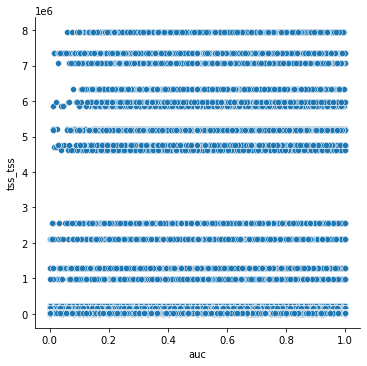

In [586]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.relplot(data=df_agg_ck_4, x='auc', y='tss_tss', ax=axes, kind='scatter')

In [757]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.relplot(data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['wfrog', 'afrog', 'trout'])].groupby(['no_of_pairs'])['auc'].mean().reset_index(), y='no_of_pairs', x='auc', ax=axes, kind='scatter')

/home/lohia/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/relational.py:929: UserWarning: relplot is a figure-level function and does not accept the ax= paramter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


ValueError: Could not interpret value `auc` for parameter `x`

In [756]:
df_agg_ck_4[~df_agg_ck_4['species'].isin(['wfrog', 'afrog', 'trout'])].groupby(['no_of_pairs'])['auc'].mean().reset_index()

no_of_pairs       auc
0           492  0.532772
1           508  0.521252
2          1796  0.489590
3         15242  0.541309
4         15916  0.498897
5         30894  0.522941
6         31458  0.531904
7         36464  0.513813
8         40592  0.525265
9         46946  0.523453
10        48746  0.517852
11        49572  0.518107
12        50812  0.508696
13        65814  0.520881
14        67336  0.527317
15       157240  0.505243
16       182118  0.527180
17       212470  0.537624
18      1301492  0.556254
19      2102814  0.611494
20      2550950  0.611008
21      4614640  0.613402
22      4716358  0.653979
23      4749866  0.638293
24      5197138  0.627456
25      5219938  0.634359
26      5853958  0.632286
27      5982508  0.641801
28      6354874  0.635602
29      7078792  0.647720
30      7368296  0.661573
31      7965026  0.630858

/home/lohia/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/relational.py:929: UserWarning: relplot is a figure-level function and does not accept the ax= paramter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


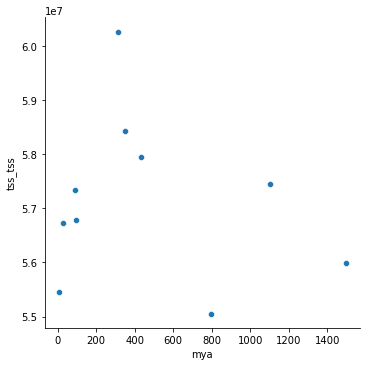

In [695]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.relplot(data=df_agg_ck_4.groupby(['mya'])['no'].mean().reset_index(), x='mya', y='tss_tss', ax=axes, kind='scatter')

In [598]:
df_agg_ck_4.groupby(['mya'])['tss_tss'].mean().reset_index()

mya       tss_tss
0     6.70  5.546188e+07
1    29.44  5.673302e+07
2    90.00  5.736381e+07
3    96.00  5.677545e+07
4   312.00  6.026818e+07
5   351.80  5.843251e+07
6   435.00  5.795615e+07
7   797.00  5.504772e+07
8  1105.00  5.744802e+07
9  1496.00  5.597363e+07

In [807]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.relplot(data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['wfrog', 'afrog', 'trout'])].groupby(['mya'])['no_of_pairs'].mean().reset_index(), x='mya', y='no_of_pairs', ax=axes, kind='scatter')

KeyError: 'Column not found: no_of_pairs'

/home/lohia/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/relational.py:929: UserWarning: relplot is a figure-level function and does not accept the ax= paramter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


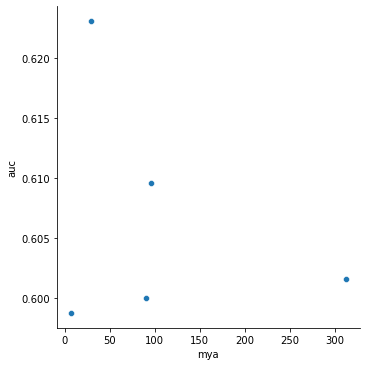

In [808]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.relplot(data=df_agg_ck_4.groupby(['mya'])['auc'].mean().reset_index(), x='mya', y='auc', ax=axes, kind='scatter')

In [189]:
df_agg_ck_4[~df_agg_ck_4['species'].isin(['wfrog', 'afrog', 'trout'])].groupby(['mya'])['species']

/home/lohia/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/relational.py:929: UserWarning: relplot is a figure-level function and does not accept the ax= paramter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


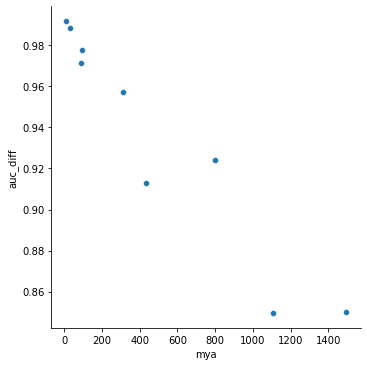

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.relplot(data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['wfrog'])].groupby(['mya'])['auc_diff'].mean().reset_index(), x='mya', y='auc_diff', ax=axes, kind='scatter')


In [342]:
y = df_agg_ck_4[~df_agg_ck_4['species'].isin(['wfrog'])].groupby(['species'])['auc', 'auc_h'].mean().reset_index()
y['auc_diff'] = y['auc']/y['auc_h']

<ipython-input-342-dffd1658dc49>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  y = df_agg_ck_4[~df_agg_ck_4['species'].isin(['wfrog'])].groupby(['species'])['auc', 'auc_h'].mean().reset_index()


In [343]:
y

species       auc     auc_h  auc_diff
0         apple  0.526839  0.603330  0.873219
1   arabidopsis  0.512230  0.576355  0.888740
2           bee  0.524596  0.605337  0.866618
3          boar  0.620632  0.641889  0.966884
4        bombyx  0.508850  0.599986  0.848103
5         brome  0.498257  0.558420  0.892263
6       chicken  0.600407  0.636657  0.943062
7         chimp  0.617092  0.641927  0.961312
8           cow  0.611918  0.637716  0.959547
9         crabm  0.629962  0.653148  0.964501
10          dog  0.637153  0.644576  0.988484
11         goat  0.597984  0.634282  0.942773
12        grape  0.510761  0.583951  0.874663
13        horse  0.620176  0.637065  0.973490
14        maize  0.515210  0.608280  0.846995
15     medicago  0.516271  0.581255  0.888200
16     mosquito  0.530403  0.601513  0.881782

/home/lohia/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/relational.py:929: UserWarning: relplot is a figure-level function and does not accept the ax= paramter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


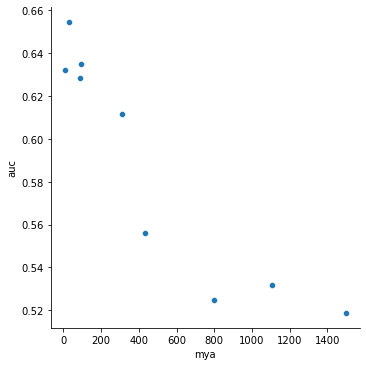

In [429]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.relplot(data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['wfrog'])].groupby(['mya'])['auc'].mean().reset_index(), x='mya', y='auc', ax=axes, kind='scatter')

/home/lohia/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/relational.py:929: UserWarning: relplot is a figure-level function and does not accept the ax= paramter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


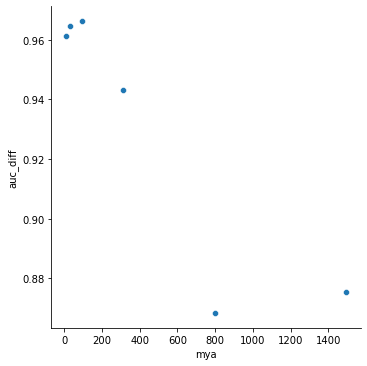

In [341]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.relplot(data=y, x='mya', y='auc_diff', ax=axes, kind='scatter')

/home/lohia/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/relational.py:929: UserWarning: relplot is a figure-level function and does not accept the ax= paramter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


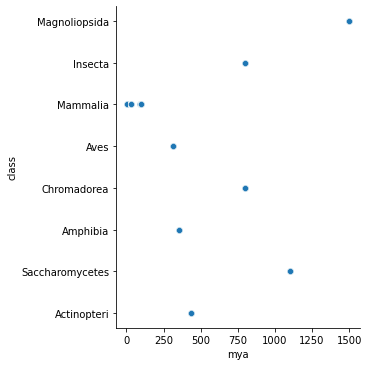

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.relplot(data=df_agg_ck_4, x='mya', y='class', ax=axes, kind='scatter')

<ipython-input-832-0b3c176c6f78>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data=df_agg_ck_3.groupby(['gene'])['auc', 'auc_h', 'gene'].mean().reset_index(), x='auc', y=df_agg_ck_3.groupby(['gene'])['auc', 'auc_h', 'gene'].mean().reset_index().index, ci=None


<AxesSubplot:xlabel='auc'>

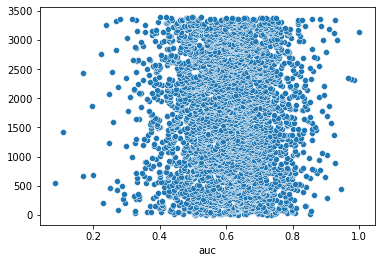

In [832]:
sns.scatterplot(
    data=df_agg_ck_3.groupby(['gene'])['auc', 'auc_h', 'gene'].mean().reset_index(), x='auc', y=df_agg_ck_3.groupby(['gene'])['auc', 'auc_h', 'gene'].mean().reset_index().index, ci=None
)

In [837]:
df_agg_ck_3

resol chr       auc     net_type             gene species     auc_h  \
0         10   X  0.637363  VC_rank_tss  ENSG00000000419    boar  0.549451   
1         10   X  0.412757  VC_rank_tss  ENSG00000000457    boar  0.703812   
2         10   X  0.533724  VC_rank_tss  ENSG00000000460    boar  0.582845   
3         10   X  0.534091  VC_rank_tss  ENSG00000000938    boar  0.835777   
4         10   X  0.721338  VC_rank_tss  ENSG00000001084    boar  0.203822   
...      ...  ..       ...          ...              ...     ...       ...   
40250     10   X  0.361111  VC_rank_tss  ENSG00000266524   sheep  0.375000   
40251     10   X  0.230769  VC_rank_tss  ENSG00000271605   sheep  0.178571   
40252     10   X  0.546703  VC_rank_tss  ENSG00000276231   sheep  0.288462   
40253     10   X  0.500000  VC_rank_tss  ENSG00000276234   sheep  0.500000   
40254     10   X  0.753425  VC_rank_tss  ENSG00000278195   sheep  0.780822   

       tss_tss  no_of_pairs  
0       540768          NaN  
1       540768          NaN  
2       540768          NaN  
3       540768          NaN  
4       540768          NaN  
...        ...          ...  
40250   600264          NaN  
40251   600264          NaN  
40252   600264          NaN  
40253   600264          NaN  
40254   600264          NaN  

[40255 rows x 9 columns]

<AxesSubplot:xlabel='gene', ylabel='species'>

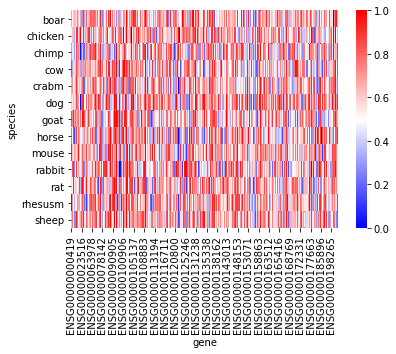

In [878]:

sns.heatmap(df_agg_ck_3.pivot("species", 'gene', "auc").dropna(axis=1), cmap='bwr')

In [903]:
df_agg_ck_3

species       auc     auc_h  auc_diff
0      boar  0.616237  0.641712  0.885632
1     chimp  0.601365  0.632039  0.873666
2       cow  0.607527  0.637660  0.882288
3     crabm  0.618241  0.642783  0.903317
4       dog  0.635055  0.642825  0.912598
5      goat  0.594963  0.634294  0.865347
6     horse  0.617830  0.637818  0.889797
7     mouse  0.613890  0.648479  0.882191
8    rabbit  0.592332  0.619826  0.853535
9       rat  0.620734  0.646048  0.889150
10  rhesusm  0.628965  0.648463  0.905479
11    sheep  0.623971  0.645505  0.897737

In [869]:
df_agg_ck_3.pivot('gene', "species", "auc_h")

species              boar   chicken     chimp       cow     crabm       dog  \
gene                                                                          
ENSG00000000005       NaN  0.040000       NaN       NaN       NaN       NaN   
ENSG00000000419  0.549451  0.569892  0.518519  0.534091  0.544444  0.549451   
ENSG00000000457  0.703812  0.713398  0.709302  0.705539  0.707615  0.706897   
ENSG00000000460  0.582845  0.587707  0.599668  0.585277  0.586925  0.584770   
ENSG00000000938  0.835777  0.841851       NaN  0.836735  0.835489  0.835489   
...                   ...       ...       ...       ...       ...       ...   
ENSG00000266524  0.372263       NaN       NaN  0.376812  0.376812  0.379562   
ENSG00000271605  0.176136  0.175824       NaN  0.166667  0.164804  0.173184   
ENSG00000276231  0.286932  0.285714       NaN  0.288136  0.276536  0.290503   
ENSG00000276234  0.500000  0.500000  0.500000  0.500000  0.500000  0.500000   
ENSG00000278195       NaN       NaN       NaN       NaN  0.777778       NaN   

species              goat     horse     mouse    rabbit       rat   rhesusm  \
gene                                                                          
ENSG00000000005       NaN       NaN  0.037037       NaN       NaN  0.019231   
ENSG00000000419  0.523810  0.540230  0.577320  0.486111  0.563830  0.577320   
ENSG00000000457  0.698795  0.704412  0.716307  0.699495  0.712079  0.715353   
ENSG00000000460  0.579819  0.586029  0.588949  0.585859  0.589888  0.588315   
ENSG00000000938  0.838855  0.835294  0.839623  0.885101  0.839185  0.838315   
...                   ...       ...       ...       ...       ...       ...   
ENSG00000266524       NaN       NaN  0.380795       NaN  0.368613  0.375862   
ENSG00000271605  0.171512  0.177326  0.176471       NaN  0.167614  0.177419   
ENSG00000276231  0.273256  0.284884  0.286096       NaN  0.272727  0.290323   
ENSG00000276234  0.500000  0.500000  0.500000  0.500000  0.500000  0.500000   
ENSG00000278195       NaN  0.782609  0.783784       NaN  0.777778  0.786667   

species             sheep  
gene                       
ENSG00000000005       NaN  
ENSG00000000419  0.563830  
ENSG00000000457  0.711433  
ENSG00000000460  0.584711  
ENSG00000000938  0.840909  
...                   ...  
ENSG00000266524  0.375000  
ENSG00000271605  0.178571  
ENSG00000276231  0.288462  
ENSG00000276234  0.500000  
ENSG00000278195  0.780822  

[3389 rows x 13 columns]

In [870]:
df_agg_ck_3.pivot('gene', "species", "auc")

species              boar   chicken     chimp       cow     crabm       dog  \
gene                                                                          
ENSG00000000005       NaN  0.240000       NaN       NaN       NaN       NaN   
ENSG00000000419  0.637363  0.569892  0.518519  0.625000  0.966667  0.532967   
ENSG00000000457  0.412757  0.450967  0.593439  0.395773  0.876078  0.597701   
ENSG00000000460  0.533724  0.627762  0.441030  0.387755  0.619971  0.525862   
ENSG00000000938  0.534091  0.500000       NaN  0.597668  0.540230  0.261135   
...                   ...       ...       ...       ...       ...       ...   
ENSG00000266524  0.397810       NaN       NaN  0.449275  0.264493  0.288321   
ENSG00000271605  0.414773  0.697802       NaN  0.457627  0.162011  0.367318   
ENSG00000276231  0.579545  0.412088       NaN  0.827684  0.479050  0.663408   
ENSG00000276234  0.500000  0.500000  0.500000  0.500000  0.500000  0.500000   
ENSG00000278195       NaN       NaN       NaN       NaN  0.055556       NaN   

species              goat     horse     mouse    rabbit       rat   rhesusm  \
gene                                                                          
ENSG00000000005       NaN       NaN  0.981481       NaN       NaN  0.980769   
ENSG00000000419  0.607143  0.528736  0.103093  0.486111  0.510638  0.561856   
ENSG00000000457  0.461596  0.442647  0.712264  0.319444  0.391152  0.484375   
ENSG00000000460  0.693524  0.576471  0.407008  0.599747  0.651685  0.661685   
ENSG00000000938  0.574172  0.398162  0.627022  0.523359  0.520716  0.417120   
...                   ...       ...       ...       ...       ...       ...   
ENSG00000266524       NaN       NaN  0.327815       NaN  0.642336  0.468966   
ENSG00000271605  0.111919  0.409884  0.930481       NaN  0.600852  0.233871   
ENSG00000276231  0.491279  0.343023  0.510695       NaN  0.605114  0.307796   
ENSG00000276234  0.500000  0.500000  0.500000  0.500000  0.500000  0.500000   
ENSG00000278195       NaN  0.913043  0.175676       NaN  0.625000  0.466667   

species             sheep  
gene                       
ENSG00000000005       NaN  
ENSG00000000419  0.648936  
ENSG00000000457  0.428375  
ENSG00000000460  0.550275  
ENSG00000000938  0.576791  
...                   ...  
ENSG00000266524  0.361111  
ENSG00000271605  0.230769  
ENSG00000276231  0.546703  
ENSG00000276234  0.500000  
ENSG00000278195  0.753425  

[3389 rows x 13 columns]

In [872]:
df_agg_ck_3.pivot('gene', "species", "auc").dropna(axis=0)

species              boar   chicken     chimp       cow     crabm       dog  \
gene                                                                          
ENSG00000000419  0.637363  0.569892  0.518519  0.625000  0.966667  0.532967   
ENSG00000000457  0.412757  0.450967  0.593439  0.395773  0.876078  0.597701   
ENSG00000000460  0.533724  0.627762  0.441030  0.387755  0.619971  0.525862   
ENSG00000001084  0.721338  0.751553  0.305556  0.490854  0.785276  0.530675   
ENSG00000001167  0.863057  0.621118  0.505208  0.307927  0.868098  0.872699   
...                   ...       ...       ...       ...       ...       ...   
ENSG00000258890  0.167614  0.211538  0.573438  0.426554  0.768156  0.509777   
ENSG00000262655  0.544118  0.267045  0.724359  0.621345  0.387931  0.432584   
ENSG00000263001  0.817164  0.854167  0.872047  0.429630  0.562963  0.927007   
ENSG00000266173  0.409091  0.704670  0.240625  0.885593  0.497207  0.243017   
ENSG00000276234  0.500000  0.500000  0.500000  0.500000  0.500000  0.500000   

species              goat     horse     mouse    rabbit       rat   rhesusm  \
gene                                                                          
ENSG00000000419  0.607143  0.528736  0.103093  0.486111  0.510638  0.561856   
ENSG00000000457  0.461596  0.442647  0.712264  0.319444  0.391152  0.484375   
ENSG00000000460  0.693524  0.576471  0.407008  0.599747  0.651685  0.661685   
ENSG00000001084  0.701923  0.598101  0.675287  0.604651  0.676036  0.710983   
ENSG00000001167  0.756410  0.933544  0.836207  0.571705  0.573964  0.828035   
...                   ...       ...       ...       ...       ...       ...   
ENSG00000258890  0.110465  0.466570  0.756684  0.527972  0.828125  0.438172   
ENSG00000262655  0.597561  0.399709  0.586486  0.086331  0.379310  0.322404   
ENSG00000263001  0.700758  0.375912  0.996528  0.552174  0.873188  0.395105   
ENSG00000266173  0.882267  0.797965  0.605615  0.272727  0.857955  0.771505   
ENSG00000276234  0.500000  0.500000  0.500000  0.500000  0.500000  0.500000   

species             sheep  
gene                       
ENSG00000000419  0.648936  
ENSG00000000457  0.428375  
ENSG00000000460  0.550275  
ENSG00000001084  0.724551  
ENSG00000001167  0.865269  
...                   ...  
ENSG00000258890  0.479396  
ENSG00000262655  0.309392  
ENSG00000263001  0.852113  
ENSG00000266173  0.641484  
ENSG00000276234  0.500000  

[2368 rows x 13 columns]

In [874]:
piv = df_agg_ck_3.pivot('gene', "species", "auc_h").dropna(axis=0)

In [875]:
piv2 = pd.DataFrame(piv.to_records())

In [876]:
piv2

gene      boar   chicken     chimp       cow     crabm  \
0     ENSG00000000419  0.549451  0.569892  0.518519  0.534091  0.544444   
1     ENSG00000000457  0.703812  0.713398  0.709302  0.705539  0.707615   
2     ENSG00000000460  0.582845  0.587707  0.599668  0.585277  0.586925   
3     ENSG00000001084  0.203822  0.211180  0.184028  0.204268  0.205521   
4     ENSG00000001167  0.984076  0.984472  0.982639  0.984756  0.984663   
...               ...       ...       ...       ...       ...       ...   
2363  ENSG00000258890  0.504261  0.504121  0.473438  0.498588  0.501397   
2364  ENSG00000262655  0.602941  0.613636  0.602564  0.596491  0.612069   
2365  ENSG00000263001  0.638060  0.626894  0.608268  0.625926  0.622222   
2366  ENSG00000266173  0.893466  0.896978  0.882812  0.894068  0.895251   
2367  ENSG00000276234  0.500000  0.500000  0.500000  0.500000  0.500000   

           dog      goat     horse     mouse    rabbit       rat   rhesusm  \
0     0.549451  0.523810  0.540230  0.577320  0.486111  0.563830  0.577320   
1     0.706897  0.698795  0.704412  0.716307  0.699495  0.712079  0.715353   
2     0.584770  0.579819  0.586029  0.588949  0.585859  0.589888  0.588315   
3     0.208589  0.192308  0.193038  0.238506  0.174419  0.221893  0.239884   
4     0.984663  0.983974  0.984177  0.985632  0.980620  0.985207  0.985549   
...        ...       ...       ...       ...       ...       ...       ...   
2363  0.504190  0.495640  0.498547  0.509358  0.564685  0.495739  0.509409   
2364  0.615169  0.603659  0.604651  0.613514  0.604317  0.606322  0.614754   
2365  0.622263  0.617424  0.627737  0.644097  0.573913  0.625000  0.634615   
2366  0.895251  0.890988  0.890988  0.899733  0.900350  0.896307  0.899194   
2367  0.500000  0.500000  0.500000  0.500000  0.500000  0.500000  0.500000   

         sheep  
0     0.563830  
1     0.711433  
2     0.584711  
3     0.209581  
4     0.985030  
...        ...  
2363  0.509615  
2364  0.613260  
2365  0.635563  
2366  0.896978  
2367  0.500000  

[2368 rows x 14 columns]

In [867]:
piv3 = pd.melt(piv2, id_vars=['gene'], value_vars=['boar',
 'chimp',
 'cow',
 'crabm',
 'dog',
 'goat',
 'horse',
 'mouse',
 'rabbit',
 'rat',
 'rhesusm',
 'sheep'])

In [862]:
piv3.groupby(['variable'])['value'].mean()

variable
boar       0.618881
chimp      0.603187
cow        0.615042
crabm      0.627876
dog        0.647948
goat       0.602281
horse      0.616743
mouse      0.623624
rabbit     0.576675
rat        0.627558
rhesusm    0.649247
sheep      0.634596
Name: value, dtype: float64

In [868]:
piv3.groupby(['variable'])['value'].mean()

variable
boar       0.647885
chimp      0.630670
cow        0.644809
crabm      0.648665
dog        0.649413
goat       0.638882
horse      0.642957
mouse      0.659033
rabbit     0.618837
rat        0.652081
rhesusm    0.658314
sheep      0.654941
Name: value, dtype: float64

In [863]:
df_agg_ck_3.groupby(['species'])['auc', 'auc_h', 'gene'].mean().reset_index()

<ipython-input-863-3be8cabbe0fb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_agg_ck_3.groupby(['species'])['auc', 'auc_h', 'gene'].mean().reset_index()


species       auc     auc_h
0      boar  0.605441  0.635740
1   chicken  0.601637  0.635241
2     chimp  0.598766  0.627346
3       cow  0.602840  0.631966
4     crabm  0.616126  0.637582
5       dog  0.631690  0.636348
6      goat  0.589929  0.628584
7     horse  0.608509  0.632371
8     mouse  0.609706  0.642922
9    rabbit  0.575098  0.617943
10      rat  0.615376  0.640458
11  rhesusm  0.630120  0.642940
12    sheep  0.619487  0.639420

<AxesSubplot:xlabel='class', ylabel='auc_diff'>

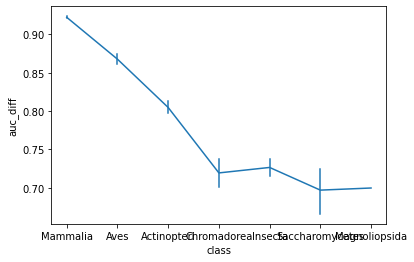

In [766]:
df_agg_ck_4.sort_values(by=['mya'], inplace=True)
sns.lineplot(
    data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['wfrog'])], y='auc_diff', x='class', sort= False, err_style="bars"
)

<AxesSubplot:xlabel='mya', ylabel='auc_diff'>

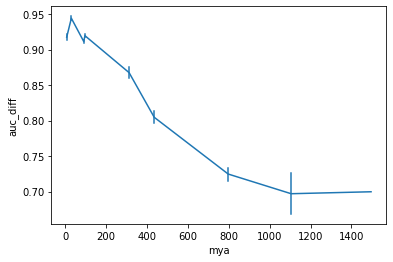

In [791]:
sns.lineplot(
    data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['wfrog'])], y='auc_diff', x='mya', sort= False, err_style="bars"
)

<AxesSubplot:xlabel='mya', ylabel='auc_diff'>

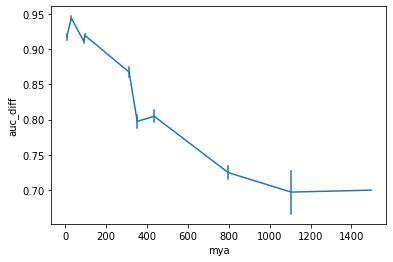

In [792]:
sns.lineplot(
    data=df_agg_ck_4, y='auc_diff', x='mya', sort= False, err_style="bars"
)

<AxesSubplot:xlabel='mya', ylabel='auc_h'>

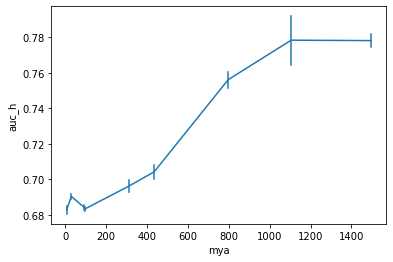

In [752]:
sns.lineplot(
    data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['wfrog'])], y='auc_h', x='mya', sort= False, err_style="bars"
)

<AxesSubplot:xlabel='mya', ylabel='auc'>

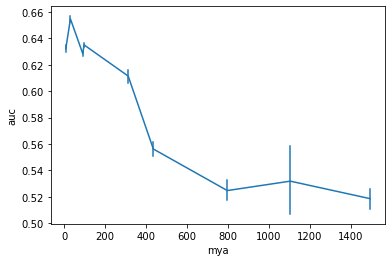

In [755]:
sns.lineplot(
    data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['wfrog'])], y='auc', x='mya', sort= False, err_style="bars"
)

<AxesSubplot:xlabel='mya', ylabel='auc'>

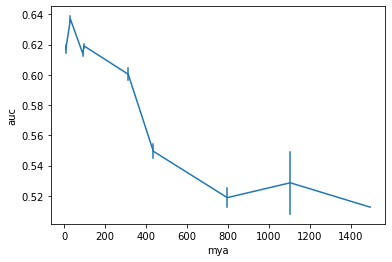

In [790]:
sns.lineplot(
    data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['wfrog'])], y='auc', x='mya', sort= False, err_style="bars"
)

<AxesSubplot:xlabel='mya', ylabel='auc_h'>

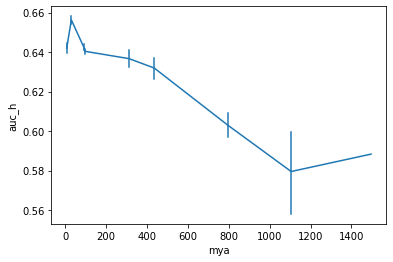

In [741]:
sns.lineplot(
    data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['wfrog'])], y='auc_h', x='mya', sort= False, err_style="bars"
)

In [750]:
df_agg_ck_4.sort_values(by=['mya'], inplace=True)

<AxesSubplot:xlabel='mya', ylabel='auc'>

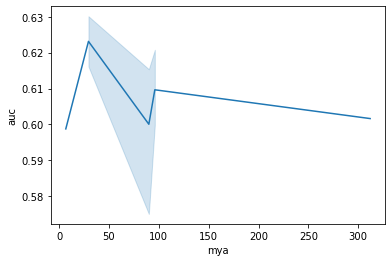

In [809]:
sns.lineplot(
    data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['wfrog'])], x='mya', y='auc'
)

<AxesSubplot:xlabel='mya_made', ylabel='auc_diff'>

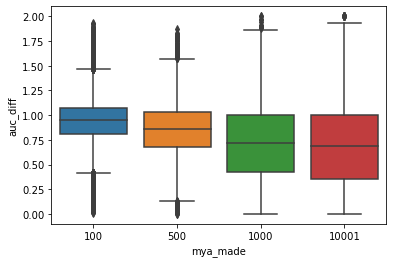

In [692]:
sns.boxplot(data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['wfrog', 'rabbit'])], x='mya_made', y='auc_diff')

<AxesSubplot:xlabel='mya_made', ylabel='auc_h'>

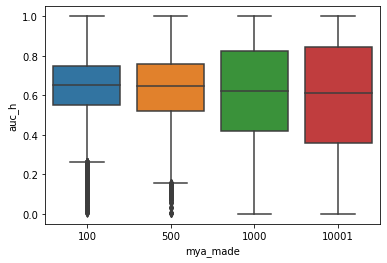

In [798]:
sns.boxplot(data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['wfrog', 'rabbit'])], x='mya_made', y='auc_h')

In [767]:
df_agg_ck_4['mya_made'] = [100 if x <=100 else 500 if x<=500 else 1000 if x<1000 else 10001 for x in df_agg_ck_4['mya']]

<AxesSubplot:xlabel='mya', ylabel='auc'>

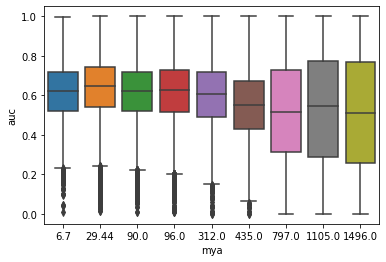

In [645]:
sns.boxplot(data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['wfrog'])], x='mya', y='auc')

In [899]:


df_agg_ck_5 = df_agg_ck_4.groupby(['Common_name'])['auc', 'auc_h', 'auc_diff', 'mya'].mean().reset_index()
df_agg_ck_5.sort_values(by=['mya'], inplace=True)

<ipython-input-899-59213620b386>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_agg_ck_5 = df_agg_ck_4.groupby(['Common_name'])['auc', 'auc_h', 'auc_diff', 'mya'].mean().reset_index()


In [784]:
df_agg_ck_5

Common_name       auc     auc_h  auc_diff      mya
4                 Chimpanzee  0.617092  0.641927  0.917596     6.70
6        Crab-eating macaque  0.629962  0.653148  0.938649    29.44
20            Rhesus macaque  0.643474  0.659341  0.949690    29.44
16                     Mouse  0.618655  0.652692  0.916256    90.00
9            European rabbit  0.594043  0.617453  0.885796    90.00
19                       Rat  0.621402  0.647153  0.922450    90.00
2                       Boar  0.620632  0.641889  0.916667    96.00
5                        Cow  0.611918  0.637716  0.910167    96.00
7                        Dog  0.637153  0.644576  0.937928    96.00
23                     Sheep  0.625978  0.646034  0.929301    96.00
11                      Goat  0.597984  0.634282  0.896614    96.00
13                     Horse  0.620176  0.637065  0.926181    96.00
3                    Chicken  0.600407  0.636657  0.867613   312.00
29       Western clawed frog  0.551509  0.624430  0.797556   351.80
32                 Zebrafish  0.549484  0.631910  0.804702   435.00
8         European honey bee  0.524596  0.605337  0.718981   797.00
31     Yellow fever mosquito  0.530651  0.602866  0.737842   797.00
22                 Roundworm  0.505389  0.601987  0.719481   797.00
24                  Silkworm  0.508850  0.599986  0.719128   797.00
30                     Yeast  0.528645  0.579525  0.697069  1105.00
1                Arabidopsis  0.512230  0.576355  0.686978  1496.00
28                    Tomato  0.521580  0.621595  0.683027  1496.00
27                   Tobacco  0.468972  0.594235  0.678540  1496.00
26                   Soybean  0.493966  0.580688  0.680289  1496.00
25                   Sorghum  0.521163  0.581995  0.701630  1496.00
15       Medicago truncatula  0.516271  0.581255  0.705017  1496.00
21                      Rice  0.509596  0.581356  0.718745  1496.00
10             Field mustard  0.519596  0.608468  0.685299  1496.00
12                     Grape  0.510761  0.583951  0.707236  1496.00
18  Purple false brome plant  0.498257  0.558420  0.687858  1496.00
17                    Potato  0.509055  0.586904  0.709657  1496.00
14                     Maize  0.515210  0.608280  0.683448  1496.00
0                      Apple  0.526839  0.603330  0.721264  1496.00

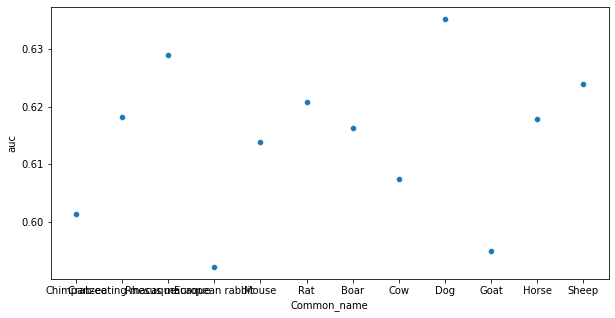

In [901]:
fig, axes = plt.subplots(figsize=(10,5))
chart = sns.scatterplot(data=df_agg_ck_5, x='Common_name', y='auc')

#chart.set_xticklabels(chart.get_xticklabels(), rotation=30,horizontalalignment='right')
#chart.set_ylim([0.5,0.7])

In [902]:
df_agg_ck_5

Common_name       auc     auc_h  auc_diff    mya
1            Chimpanzee  0.601365  0.632039  0.873666   6.70
3   Crab-eating macaque  0.618241  0.642783  0.903317  29.44
10       Rhesus macaque  0.628965  0.648463  0.905479  29.44
5       European rabbit  0.592332  0.619826  0.853535  90.00
8                 Mouse  0.613890  0.648479  0.882191  90.00
9                   Rat  0.620734  0.646048  0.889150  90.00
0                  Boar  0.616237  0.641712  0.885632  96.00
2                   Cow  0.607527  0.637660  0.882288  96.00
4                   Dog  0.635055  0.642825  0.912598  96.00
6                  Goat  0.594963  0.634294  0.865347  96.00
7                 Horse  0.617830  0.637818  0.889797  96.00
11                Sheep  0.623971  0.645505  0.897737  96.00

In [898]:
df_agg_ck_5

Common_name       auc     auc_h    mya
1            Chimpanzee  0.601365  0.632039   6.70
3   Crab-eating macaque  0.618241  0.642783  29.44
10       Rhesus macaque  0.628965  0.648463  29.44
5       European rabbit  0.592332  0.619826  90.00
8                 Mouse  0.613890  0.648479  90.00
9                   Rat  0.620734  0.646048  90.00
0                  Boar  0.616237  0.641712  96.00
2                   Cow  0.607527  0.637660  96.00
4                   Dog  0.635055  0.642825  96.00
6                  Goat  0.594963  0.634294  96.00
7                 Horse  0.617830  0.637818  96.00
11                Sheep  0.623971  0.645505  96.00

In [836]:
df_agg_ck_5

Common_name       auc     auc_h     mya
2            Chimpanzee  0.598766  0.627346    6.70
4   Crab-eating macaque  0.616126  0.637582   29.44
11       Rhesus macaque  0.630120  0.642940   29.44
6       European rabbit  0.575098  0.617943   90.00
9                 Mouse  0.609706  0.642922   90.00
10                  Rat  0.615376  0.640458   90.00
0                  Boar  0.605441  0.635740   96.00
3                   Cow  0.602840  0.631966   96.00
5                   Dog  0.631690  0.636348   96.00
7                  Goat  0.589929  0.628584   96.00
8                 Horse  0.608509  0.632371   96.00
12                Sheep  0.619487  0.639420   96.00
1               Chicken  0.601637  0.635241  312.00

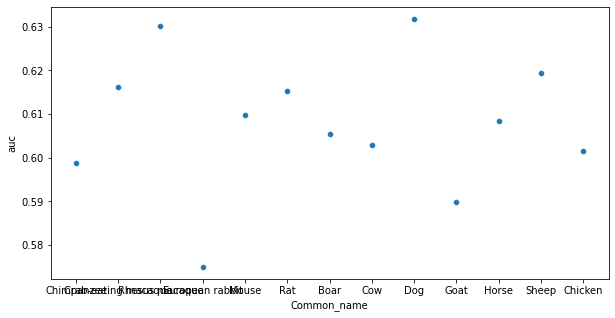

In [854]:
fig, axes = plt.subplots(figsize=(10,5))
chart = sns.scatterplot(data=df_agg_ck_5, x='Common_name', y='auc')

#chart.set_xticklabels(chart.get_xticklabels(), rotation=30,horizontalalignment='right')
#chart.set_ylim([0.5,0.7])

In [819]:
df_agg_ck_5

Common_name       auc     auc_h     mya
2            Chimpanzee  0.598766  0.627346    6.70
4   Crab-eating macaque  0.616126  0.637582   29.44
11       Rhesus macaque  0.630120  0.642940   29.44
6       European rabbit  0.575098  0.617943   90.00
9                 Mouse  0.609706  0.642922   90.00
10                  Rat  0.615376  0.640458   90.00
0                  Boar  0.605441  0.635740   96.00
3                   Cow  0.602840  0.631966   96.00
5                   Dog  0.631690  0.636348   96.00
7                  Goat  0.589929  0.628584   96.00
8                 Horse  0.608509  0.632371   96.00
12                Sheep  0.619487  0.639420   96.00
1               Chicken  0.601637  0.635241  312.00

In [801]:
df_agg_ck_5

Common_name       auc     auc_h  auc_diff      mya
4                 Chimpanzee  0.617092  0.641927  0.917596     6.70
6        Crab-eating macaque  0.629962  0.653148  0.938649    29.44
20            Rhesus macaque  0.643474  0.659341  0.949690    29.44
16                     Mouse  0.618655  0.652692  0.916256    90.00
9            European rabbit  0.594043  0.617453  0.885796    90.00
19                       Rat  0.621402  0.647153  0.922450    90.00
2                       Boar  0.620632  0.641889  0.916667    96.00
5                        Cow  0.611918  0.637716  0.910167    96.00
7                        Dog  0.637153  0.644576  0.937928    96.00
23                     Sheep  0.625978  0.646034  0.929301    96.00
11                      Goat  0.597984  0.634282  0.896614    96.00
13                     Horse  0.620176  0.637065  0.926181    96.00
3                    Chicken  0.600407  0.636657  0.867613   312.00
29       Western clawed frog  0.551509  0.624430  0.797556   351.80
32                 Zebrafish  0.549484  0.631910  0.804702   435.00
8         European honey bee  0.524596  0.605337  0.718981   797.00
31     Yellow fever mosquito  0.530651  0.602866  0.737842   797.00
22                 Roundworm  0.505389  0.601987  0.719481   797.00
24                  Silkworm  0.508850  0.599986  0.719128   797.00
30                     Yeast  0.528645  0.579525  0.697069  1105.00
1                Arabidopsis  0.512230  0.576355  0.686978  1496.00
28                    Tomato  0.521580  0.621595  0.683027  1496.00
27                   Tobacco  0.468972  0.594235  0.678540  1496.00
26                   Soybean  0.493966  0.580688  0.680289  1496.00
25                   Sorghum  0.521163  0.581995  0.701630  1496.00
15       Medicago truncatula  0.516271  0.581255  0.705017  1496.00
21                      Rice  0.509596  0.581356  0.718745  1496.00
10             Field mustard  0.519596  0.608468  0.685299  1496.00
12                     Grape  0.510761  0.583951  0.707236  1496.00
18  Purple false brome plant  0.498257  0.558420  0.687858  1496.00
17                    Potato  0.509055  0.586904  0.709657  1496.00
14                     Maize  0.515210  0.608280  0.683448  1496.00
0                      Apple  0.526839  0.603330  0.721264  1496.00

<ipython-input-786-456ce013e096>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=30,horizontalalignment='right')


[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, ''),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, ''),
 Text(31, 0, ''),
 Text(32, 0, '')]

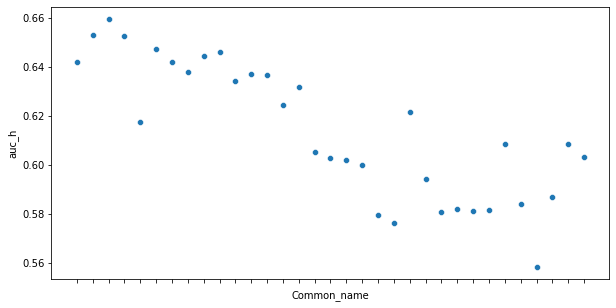

In [786]:
fig, axes = plt.subplots(figsize=(10,5))
chart = sns.scatterplot(data=df_agg_ck_5, x='Common_name', y='auc_h')

chart.set_xticklabels(chart.get_xticklabels(), rotation=30,horizontalalignment='right')

[Text(0, 0, 'Chimpanzee'),
 Text(1, 0, 'Crab-eating macaque'),
 Text(2, 0, 'Rhesus macaque'),
 Text(3, 0, 'Mouse'),
 Text(4, 0, 'European rabbit'),
 Text(5, 0, 'Rat'),
 Text(6, 0, 'Boar'),
 Text(7, 0, 'Cow'),
 Text(8, 0, 'Dog'),
 Text(9, 0, 'Sheep'),
 Text(10, 0, 'Goat'),
 Text(11, 0, 'Horse'),
 Text(12, 0, 'Chicken'),
 Text(13, 0, 'Western clawed frog'),
 Text(14, 0, 'Zebrafish'),
 Text(15, 0, 'European honey bee'),
 Text(16, 0, 'Yellow fever mosquito'),
 Text(17, 0, 'Roundworm'),
 Text(18, 0, 'Silkworm'),
 Text(19, 0, 'Yeast'),
 Text(20, 0, 'Arabidopsis'),
 Text(21, 0, 'Tomato'),
 Text(22, 0, 'Tobacco'),
 Text(23, 0, 'Soybean'),
 Text(24, 0, 'Sorghum'),
 Text(25, 0, 'Medicago truncatula'),
 Text(26, 0, 'Rice'),
 Text(27, 0, 'Field mustard'),
 Text(28, 0, 'Grape'),
 Text(29, 0, 'Purple false brome plant'),
 Text(30, 0, 'Potato'),
 Text(31, 0, 'Maize'),
 Text(32, 0, 'Apple')]

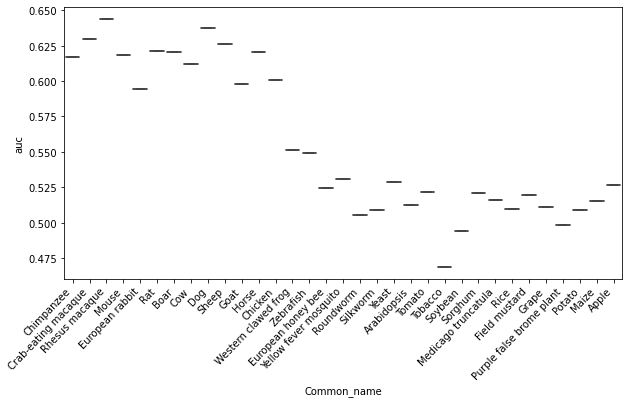

In [794]:
fig, axes = plt.subplots(figsize=(10,5))
chart = sns.boxplot(data=df_agg_ck_5, x='Common_name', y='auc')

chart.set_xticklabels(chart.get_xticklabels(), rotation=46,horizontalalignment='right')


<ipython-input-770-8477336872eb>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  chart = sns.boxplot(data=df_agg_ck_4.groupby(['Common_name'])['auc', 'auc_h', 'auc_diff'].mean().reset_index(), x='Common_name', y='auc_diff', order = mya.sort_values(by=['mya'])['Common_name'].to_list(), ax=axes)


[Text(0, 0, 'Human'),
 Text(1, 0, 'Chimpanzee'),
 Text(2, 0, 'Crab-eating macaque'),
 Text(3, 0, 'Rhesus macaque'),
 Text(4, 0, 'Rat'),
 Text(5, 0, 'Mouse'),
 Text(6, 0, 'European rabbit'),
 Text(7, 0, 'Cow'),
 Text(8, 0, 'Boar'),
 Text(9, 0, 'Horse'),
 Text(10, 0, 'Sheep'),
 Text(11, 0, 'Goat'),
 Text(12, 0, 'Dog'),
 Text(13, 0, 'Chicken'),
 Text(14, 0, 'Western clawed frog'),
 Text(15, 0, 'Zebrafish'),
 Text(16, 0, 'Silkworm'),
 Text(17, 0, 'European honey bee'),
 Text(18, 0, 'Yellow fever mosquito'),
 Text(19, 0, 'Roundworm'),
 Text(20, 0, 'Yeast'),
 Text(21, 0, 'Sorghum'),
 Text(22, 0, 'Field mustard'),
 Text(23, 0, 'Algae'),
 Text(24, 0, 'Tomato'),
 Text(25, 0, 'Arabidopsis'),
 Text(26, 0, 'Medicago truncatula'),
 Text(27, 0, 'Grape'),
 Text(28, 0, 'Apple'),
 Text(29, 0, 'Purple false brome plant'),
 Text(30, 0, 'Soybean'),
 Text(31, 0, 'Rice'),
 Text(32, 0, 'Maize'),
 Text(33, 0, 'Potato'),
 Text(34, 0, 'Tobacco')]

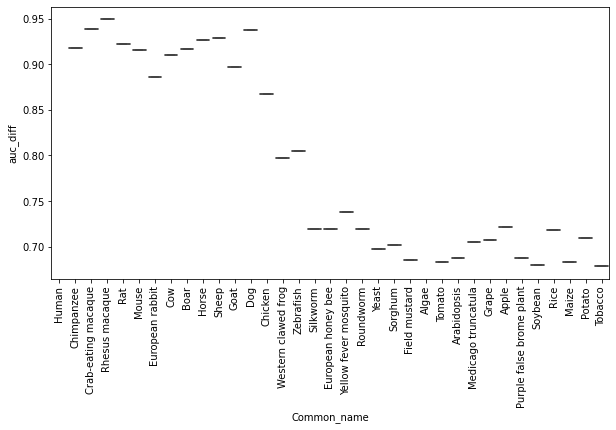

In [770]:
fig, axes = plt.subplots(figsize=(10,5))
chart = sns.boxplot(data=df_agg_ck_4.groupby(['Common_name'])['auc', 'auc_h', 'auc_diff'].mean().reset_index(), x='Common_name', y='auc_diff', order = mya.sort_values(by=['mya'])['Common_name'].to_list(), ax=axes)

chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
#chart.set_ylim([0.8,1])

<ipython-input-570-20c962deec09>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  chart = sns.boxplot(data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['wfrolg'])].groupby(['Common_name'])['auc', 'auc_h', 'auc_diff'].mean().reset_index(), x='Common_name', y='auc', order = mya.sort_values(by=['mya'])['Common_name'].to_list(), ax=axes)


[Text(0, 0, 'Human'),
 Text(1, 0, 'Chimpanzee'),
 Text(2, 0, 'Crab-eating macaque'),
 Text(3, 0, 'Rhesus macaque'),
 Text(4, 0, 'Rat'),
 Text(5, 0, 'Mouse'),
 Text(6, 0, 'European rabbit'),
 Text(7, 0, 'Cow'),
 Text(8, 0, 'Boar'),
 Text(9, 0, 'Horse'),
 Text(10, 0, 'Sheep'),
 Text(11, 0, 'Goat'),
 Text(12, 0, 'Dog'),
 Text(13, 0, 'Chicken'),
 Text(14, 0, 'Western clawed frog'),
 Text(15, 0, 'Zebrafish'),
 Text(16, 0, 'Silkworm'),
 Text(17, 0, 'European honey bee'),
 Text(18, 0, 'Yellow fever mosquito'),
 Text(19, 0, 'Roundworm'),
 Text(20, 0, 'Yeast'),
 Text(21, 0, 'Sorghum'),
 Text(22, 0, 'Field mustard'),
 Text(23, 0, 'Algae'),
 Text(24, 0, 'Tomato'),
 Text(25, 0, 'Arabidopsis'),
 Text(26, 0, 'Medicago truncatula'),
 Text(27, 0, 'Grape'),
 Text(28, 0, 'Apple'),
 Text(29, 0, 'Purple false brome plant'),
 Text(30, 0, 'Soybean'),
 Text(31, 0, 'Rice'),
 Text(32, 0, 'Maize'),
 Text(33, 0, 'Potato'),
 Text(34, 0, 'Tobacco')]

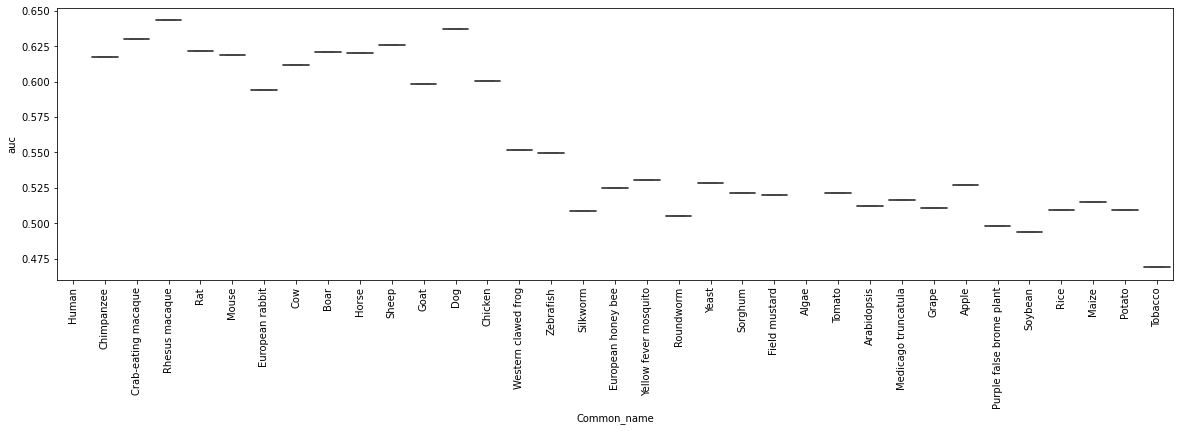

In [570]:
fig, axes = plt.subplots(figsize=(20,5))
chart = sns.boxplot(data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['wfrolg'])].groupby(['Common_name'])['auc', 'auc_h', 'auc_diff'].mean().reset_index(), x='Common_name', y='auc', order = mya.sort_values(by=['mya'])['Common_name'].to_list(), ax=axes)

chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
#chart.set_ylim([0.8,1])

<ipython-input-569-f646b7dd3cf8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  chart = sns.boxplot(data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['wfrolg'])].groupby(['Common_name'])['auc', 'auc_h', 'auc_diff'].mean().reset_index(), x='Common_name', y='auc_h', order = mya.sort_values(by=['mya'])['Common_name'].to_list(), ax=axes)


[Text(0, 0, 'Human'),
 Text(1, 0, 'Chimpanzee'),
 Text(2, 0, 'Crab-eating macaque'),
 Text(3, 0, 'Rhesus macaque'),
 Text(4, 0, 'Rat'),
 Text(5, 0, 'Mouse'),
 Text(6, 0, 'European rabbit'),
 Text(7, 0, 'Cow'),
 Text(8, 0, 'Boar'),
 Text(9, 0, 'Horse'),
 Text(10, 0, 'Sheep'),
 Text(11, 0, 'Goat'),
 Text(12, 0, 'Dog'),
 Text(13, 0, 'Chicken'),
 Text(14, 0, 'Western clawed frog'),
 Text(15, 0, 'Zebrafish'),
 Text(16, 0, 'Silkworm'),
 Text(17, 0, 'European honey bee'),
 Text(18, 0, 'Yellow fever mosquito'),
 Text(19, 0, 'Roundworm'),
 Text(20, 0, 'Yeast'),
 Text(21, 0, 'Sorghum'),
 Text(22, 0, 'Field mustard'),
 Text(23, 0, 'Algae'),
 Text(24, 0, 'Tomato'),
 Text(25, 0, 'Arabidopsis'),
 Text(26, 0, 'Medicago truncatula'),
 Text(27, 0, 'Grape'),
 Text(28, 0, 'Apple'),
 Text(29, 0, 'Purple false brome plant'),
 Text(30, 0, 'Soybean'),
 Text(31, 0, 'Rice'),
 Text(32, 0, 'Maize'),
 Text(33, 0, 'Potato'),
 Text(34, 0, 'Tobacco')]

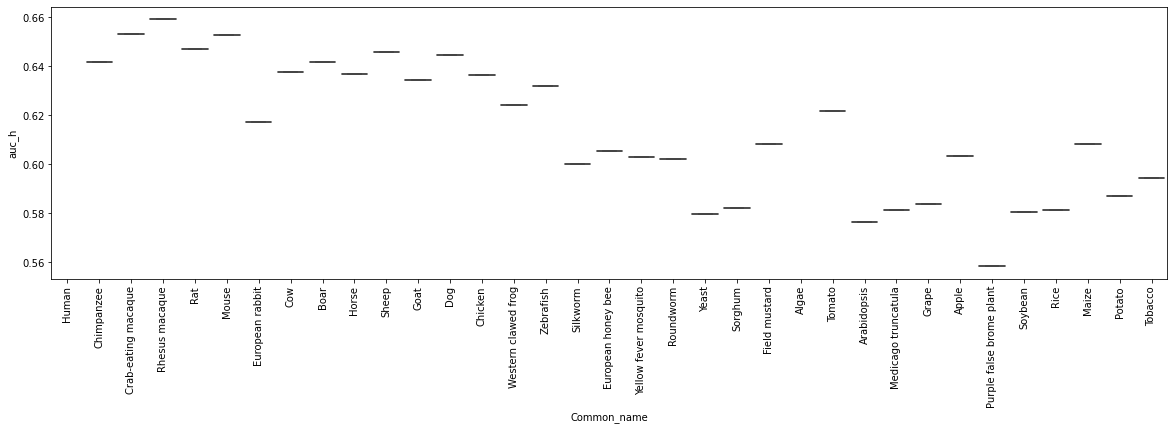

In [569]:
fig, axes = plt.subplots(figsize=(20,5))
chart = sns.boxplot(data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['wfrolg'])].groupby(['Common_name'])['auc', 'auc_h', 'auc_diff'].mean().reset_index(), x='Common_name', y='auc_h', order = mya.sort_values(by=['mya'])['Common_name'].to_list(), ax=axes)

chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'human'),
 Text(1, 0, 'chimp'),
 Text(2, 0, 'crabm'),
 Text(3, 0, 'rhesusm'),
 Text(4, 0, 'rat'),
 Text(5, 0, 'mouse'),
 Text(6, 0, 'rabbit'),
 Text(7, 0, 'cow'),
 Text(8, 0, 'boar'),
 Text(9, 0, 'horse'),
 Text(10, 0, 'sheep'),
 Text(11, 0, 'goat'),
 Text(12, 0, 'dog'),
 Text(13, 0, 'chicken'),
 Text(14, 0, 'wfrog'),
 Text(15, 0, 'zebrafish'),
 Text(16, 0, 'bombyx'),
 Text(17, 0, 'bee'),
 Text(18, 0, 'mosquito'),
 Text(19, 0, 'roundworm'),
 Text(20, 0, 'yeast'),
 Text(21, 0, 'sorghum'),
 Text(22, 0, 'mustard'),
 Text(23, 0, 'chlam'),
 Text(24, 0, 'tomato'),
 Text(25, 0, 'arabidopsis'),
 Text(26, 0, 'medicago'),
 Text(27, 0, 'grape'),
 Text(28, 0, 'apple'),
 Text(29, 0, 'brome'),
 Text(30, 0, 'soybean'),
 Text(31, 0, 'rice'),
 Text(32, 0, 'maize'),
 Text(33, 0, 'potato'),
 Text(34, 0, 'tobacco')]

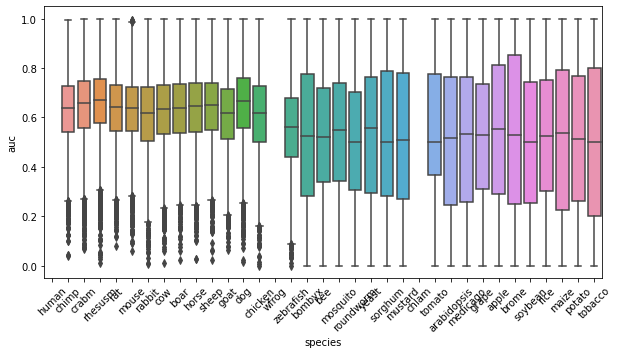

In [433]:
fig, axes = plt.subplots(figsize=(10,5))
chart = sns.boxplot(data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['wfrog'])], x='species', y='auc', order = mya.sort_values(by=['mya'])['species_x'].to_list(), ax=axes)

chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [431]:
df_agg_ck_4

resol chr       auc     net_type             gene    species  \
0          10   X  0.588235  VC_rank_tss  ENSG00000000419      apple   
2          10   X  0.518519  VC_rank_tss  ENSG00000005175      apple   
4          10   X  0.238095  VC_rank_tss  ENSG00000006530      apple   
5          10   X  0.083333  VC_rank_tss  ENSG00000007080      apple   
6          10   X  0.131579  VC_rank_tss  ENSG00000007202      apple   
...       ...  ..       ...          ...              ...        ...   
154200     10   X  0.306723  VC_rank_tss  ENSG00000273899  zebrafish   
154202     10   X  0.589981  VC_rank_tss  ENSG00000274386  zebrafish   
154203     10   X  0.650224  VC_rank_tss  ENSG00000274523  zebrafish   
154204     10   X  0.560127  VC_rank_tss  ENSG00000275835  zebrafish   
154205     10   X  0.500000  VC_rank_tss  ENSG00000276234  zebrafish   

           auc_h  no_of_pairs  auc_diff  species_x  ...  Tax_ID superkingdom  \
0       0.764706        15242  0.769231      apple  ...    3750    Eukaryota   
2       0.518519        15242  1.000000      apple  ...    3750    Eukaryota   
4       0.619048        15242  0.384615      apple  ...    3750    Eukaryota   
5       0.875000        15242  0.095238      apple  ...    3750    Eukaryota   
6       1.000000        15242  0.131579      apple  ...    3750    Eukaryota   
...          ...          ...       ...        ...  ...     ...          ...   
154200  0.722689      1301492  0.424419  zebrafish  ...    7955    Eukaryota   
154202  0.654183      1301492  0.901859  zebrafish  ...    7955    Eukaryota   
154203  0.886398      1301492  0.733558  zebrafish  ...    7955    Eukaryota   
154204  0.715190      1301492  0.783186  zebrafish  ...    7955    Eukaryota   
154205  0.500000      1301492  1.000000  zebrafish  ...    7955    Eukaryota   

              kingdom        phylum          class          order      family  \
0       Viridiplantae  Streptophyta  Magnoliopsida        Rosales    Rosaceae   
2       Viridiplantae  Streptophyta  Magnoliopsida        Rosales    Rosaceae   
4       Viridiplantae  Streptophyta  Magnoliopsida        Rosales    Rosaceae   
5       Viridiplantae  Streptophyta  Magnoliopsida        Rosales    Rosaceae   
6       Viridiplantae  Streptophyta  Magnoliopsida        Rosales    Rosaceae   
...               ...           ...            ...            ...         ...   
154200        Metazoa      Chordata    Actinopteri  Cypriniformes  Danionidae   
154202        Metazoa      Chordata    Actinopteri  Cypriniformes  Danionidae   
154203        Metazoa      Chordata    Actinopteri  Cypriniformes  Danionidae   
154204        Metazoa      Chordata    Actinopteri  Cypriniformes  Danionidae   
154205        Metazoa      Chordata    Actinopteri  Cypriniformes  Danionidae   

        genus species_y saved_name  
0       Malus       NaN      apple  
2       Malus       NaN      apple  
4       Malus       NaN      apple  
5       Malus       NaN      apple  
6       Malus       NaN      apple  
...       ...       ...        ...  
154200  Danio       NaN  zebrafish  
154202  Danio       NaN  zebrafish  
154203  Danio       NaN  zebrafish  
154204  Danio       NaN  zebrafish  
154205  Danio       NaN  zebrafish  

[126637 rows x 23 columns]

[Text(0, 0, '0.6092896174863388'),
 Text(1, 0, '0.8205444025630529'),
 Text(2, 0, '0.8294610432148883'),
 Text(3, 0, '0.8376657663220459'),
 Text(4, 0, '0.8407711684306705'),
 Text(5, 0, '0.8489671868626952'),
 Text(6, 0, '0.8494622986731722'),
 Text(7, 0, '0.8632254304464607'),
 Text(8, 0, '0.8659512195121951'),
 Text(9, 0, '0.8790668997884844'),
 Text(10, 0, '0.8962643385894531'),
 Text(11, 0, '0.8974011631552655'),
 Text(12, 0, '0.9112392357351875'),
 Text(13, 0, '0.9130475566658017'),
 Text(14, 0, '0.9171726304278506'),
 Text(15, 0, '0.9219788277654675'),
 Text(16, 0, '0.9241146711635749'),
 Text(17, 0, '0.9389665478577263'),
 Text(18, 0, '0.9446148169389945'),
 Text(19, 0, '0.9572278549531368'),
 Text(20, 0, '0.9572915233092876'),
 Text(21, 0, '0.9672475289956354'),
 Text(22, 0, '0.9692784187195859'),
 Text(23, 0, '0.9710665493209678'),
 Text(24, 0, '0.9731751696064506'),
 Text(25, 0, '0.9742173478632913'),
 Text(26, 0, '0.9758901250212644'),
 Text(27, 0, '0.9871153147323681'),
 T

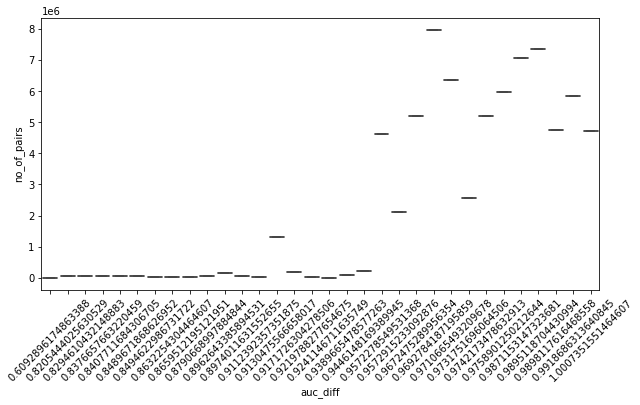

In [215]:
fig, axes = plt.subplots(figsize=(10,5))
chart = sns.boxplot(data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['wfrog'])], x='auc_diff', y='no_of_pairs', ax=axes)

chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

<ipython-input-518-439d8104b1c0>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  chart = sns.boxplot(data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['yeast'])].groupby(['class'])['auc', 'auc_h', 'auc_diff'].mean().reset_index(), x='class', y='auc_diff', order = mya.sort_values(by=['mya'])['class'].to_list(), ax=axes)


[Text(0, 0, 'Mammalia'),
 Text(1, 0, 'Mammalia'),
 Text(2, 0, 'Mammalia'),
 Text(3, 0, 'Mammalia'),
 Text(4, 0, 'Mammalia'),
 Text(5, 0, 'Mammalia'),
 Text(6, 0, 'Mammalia'),
 Text(7, 0, 'Mammalia'),
 Text(8, 0, 'Mammalia'),
 Text(9, 0, 'Mammalia'),
 Text(10, 0, 'Mammalia'),
 Text(11, 0, 'Mammalia'),
 Text(12, 0, 'Mammalia'),
 Text(13, 0, 'Aves'),
 Text(14, 0, 'Amphibia'),
 Text(15, 0, 'Actinopteri'),
 Text(16, 0, 'Insecta'),
 Text(17, 0, 'Insecta'),
 Text(18, 0, 'Insecta'),
 Text(19, 0, 'Chromadorea'),
 Text(20, 0, 'Saccharomycetes'),
 Text(21, 0, 'Magnoliopsida'),
 Text(22, 0, 'Magnoliopsida'),
 Text(23, 0, 'Chlorophyceae'),
 Text(24, 0, 'Magnoliopsida'),
 Text(25, 0, 'Magnoliopsida'),
 Text(26, 0, 'Magnoliopsida'),
 Text(27, 0, 'Magnoliopsida'),
 Text(28, 0, 'Magnoliopsida'),
 Text(29, 0, 'Magnoliopsida'),
 Text(30, 0, 'Magnoliopsida'),
 Text(31, 0, 'Magnoliopsida'),
 Text(32, 0, 'Magnoliopsida'),
 Text(33, 0, 'Magnoliopsida'),
 Text(34, 0, 'Magnoliopsida')]

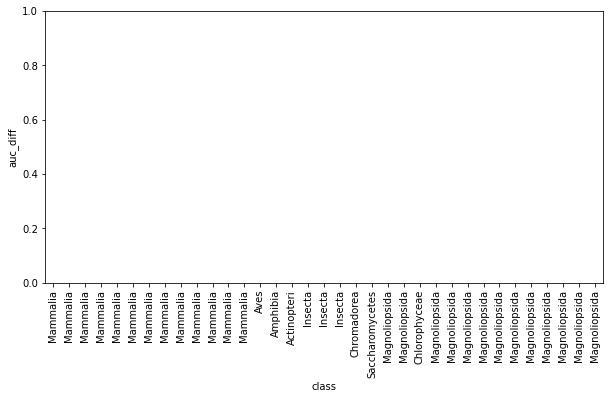

In [518]:
fig, axes = plt.subplots(figsize=(10,5))
chart = sns.boxplot(data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['yeast'])].groupby(['class'])['auc', 'auc_h', 'auc_diff'].mean().reset_index(), x='class', y='auc_diff', order = mya.sort_values(by=['mya'])['class'].to_list(), ax=axes)

chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

<ipython-input-789-439d8104b1c0>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  chart = sns.boxplot(data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['yeast'])].groupby(['class'])['auc', 'auc_h', 'auc_diff'].mean().reset_index(), x='class', y='auc_diff', order = mya.sort_values(by=['mya'])['class'].to_list(), ax=axes)


[Text(0, 0, 'Mammalia'),
 Text(1, 0, 'Mammalia'),
 Text(2, 0, 'Mammalia'),
 Text(3, 0, 'Mammalia'),
 Text(4, 0, 'Mammalia'),
 Text(5, 0, 'Mammalia'),
 Text(6, 0, 'Mammalia'),
 Text(7, 0, 'Mammalia'),
 Text(8, 0, 'Mammalia'),
 Text(9, 0, 'Mammalia'),
 Text(10, 0, 'Mammalia'),
 Text(11, 0, 'Mammalia'),
 Text(12, 0, 'Mammalia'),
 Text(13, 0, 'Aves'),
 Text(14, 0, 'Amphibia'),
 Text(15, 0, 'Actinopteri'),
 Text(16, 0, 'Insecta'),
 Text(17, 0, 'Insecta'),
 Text(18, 0, 'Insecta'),
 Text(19, 0, 'Chromadorea'),
 Text(20, 0, 'Saccharomycetes'),
 Text(21, 0, 'Magnoliopsida'),
 Text(22, 0, 'Magnoliopsida'),
 Text(23, 0, 'Chlorophyceae'),
 Text(24, 0, 'Magnoliopsida'),
 Text(25, 0, 'Magnoliopsida'),
 Text(26, 0, 'Magnoliopsida'),
 Text(27, 0, 'Magnoliopsida'),
 Text(28, 0, 'Magnoliopsida'),
 Text(29, 0, 'Magnoliopsida'),
 Text(30, 0, 'Magnoliopsida'),
 Text(31, 0, 'Magnoliopsida'),
 Text(32, 0, 'Magnoliopsida'),
 Text(33, 0, 'Magnoliopsida'),
 Text(34, 0, 'Magnoliopsida')]

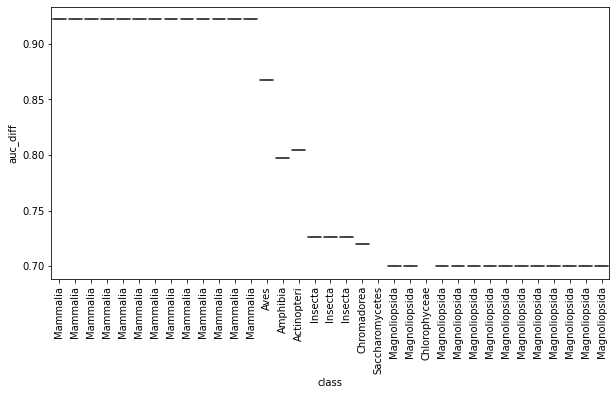

In [789]:
fig, axes = plt.subplots(figsize=(10,5))
chart = sns.boxplot(data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['yeast'])].groupby(['class'])['auc', 'auc_h', 'auc_diff'].mean().reset_index(), x='class', y='auc_diff', order = mya.sort_values(by=['mya'])['class'].to_list(), ax=axes)

chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [796]:
df_agg_ck_4['count'] = 1
df_agg_ck_4.groupby(['species'])['count'].sum()

species
apple            552
arabidopsis      991
bee             1858
boar            9906
bombyx          1139
brome             98
chicken         6252
chimp          10525
cow             9850
crabm          11532
dog             9376
goat            9272
grape           1116
horse           9439
maize            831
medicago         972
mosquito        2017
mouse          12210
mustard          782
potato           979
rabbit          6917
rat            10908
rhesusm        11746
rice             957
roundworm       1731
sheep          10553
sorghum          865
soybean          547
tobacco          173
tomato            86
wfrog           4294
yeast            767
zebrafish       4966
Name: count, dtype: int64

<ipython-input-709-9c509deb4ecf>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  chart = sns.boxplot(data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['yeastl'])].groupby(['class'])['auc', 'auc_h', 'auc_diff'].mean().reset_index(), x='class', y='auc_diff', order = (mya.sort_values(by=['mya'])).drop_duplicates('class')['class'].to_list(), ax=axes)


[Text(0, 0, 'Mammalia'),
 Text(1, 0, 'Aves'),
 Text(2, 0, 'Amphibia'),
 Text(3, 0, 'Actinopteri'),
 Text(4, 0, 'Insecta'),
 Text(5, 0, 'Chromadorea'),
 Text(6, 0, 'Saccharomycetes'),
 Text(7, 0, 'Magnoliopsida'),
 Text(8, 0, 'Chlorophyceae')]

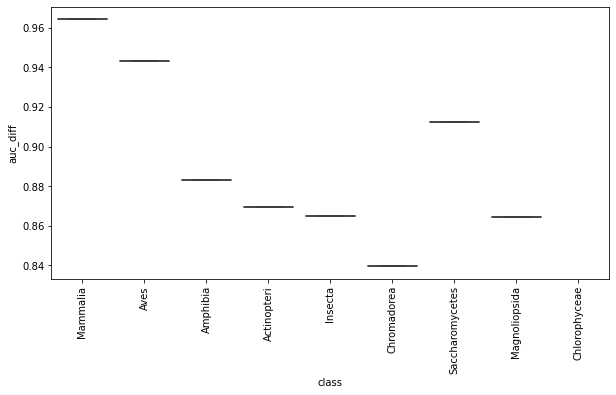

In [709]:
fig, axes = plt.subplots(figsize=(10,5))
chart = sns.boxplot(data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['yeastl'])].groupby(['class'])['auc', 'auc_h', 'auc_diff'].mean().reset_index(), x='class', y='auc_diff', order = (mya.sort_values(by=['mya'])).drop_duplicates('class')['class'].to_list(), ax=axes)

chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

<ipython-input-713-9c509deb4ecf>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  chart = sns.boxplot(data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['yeastl'])].groupby(['class'])['auc', 'auc_h', 'auc_diff'].mean().reset_index(), x='class', y='auc_diff', order = (mya.sort_values(by=['mya'])).drop_duplicates('class')['class'].to_list(), ax=axes)


[Text(0, 0, 'Mammalia'),
 Text(1, 0, 'Aves'),
 Text(2, 0, 'Amphibia'),
 Text(3, 0, 'Actinopteri'),
 Text(4, 0, 'Insecta'),
 Text(5, 0, 'Chromadorea'),
 Text(6, 0, 'Saccharomycetes'),
 Text(7, 0, 'Magnoliopsida'),
 Text(8, 0, 'Chlorophyceae')]

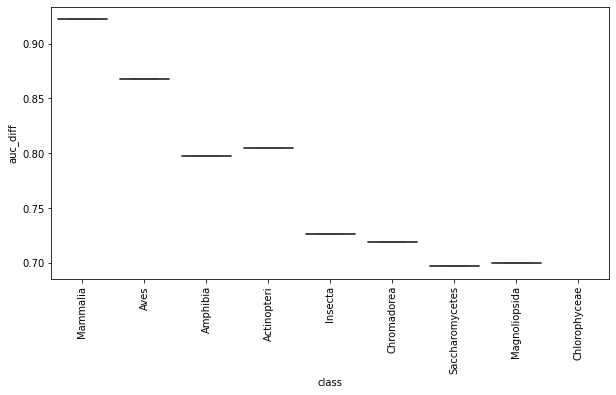

In [713]:
fig, axes = plt.subplots(figsize=(10,5))
chart = sns.boxplot(data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['yeastl'])].groupby(['class'])['auc', 'auc_h', 'auc_diff'].mean().reset_index(), x='class', y='auc_diff', order = (mya.sort_values(by=['mya'])).drop_duplicates('class')['class'].to_list(), ax=axes)

chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

<ipython-input-554-027abae38170>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  chart = sns.boxplot(data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['yeast'])].groupby(['class'])['auc', 'auc_h', 'auc_diff'].mean().reset_index(), x='class', y='auc', order = mya.sort_values(by=['mya'])['class'].to_list(), ax=axes)


[Text(0, 0, 'Mammalia'),
 Text(1, 0, 'Mammalia'),
 Text(2, 0, 'Mammalia'),
 Text(3, 0, 'Mammalia'),
 Text(4, 0, 'Mammalia'),
 Text(5, 0, 'Mammalia'),
 Text(6, 0, 'Mammalia'),
 Text(7, 0, 'Mammalia'),
 Text(8, 0, 'Mammalia'),
 Text(9, 0, 'Mammalia'),
 Text(10, 0, 'Mammalia'),
 Text(11, 0, 'Mammalia'),
 Text(12, 0, 'Mammalia'),
 Text(13, 0, 'Aves'),
 Text(14, 0, 'Amphibia'),
 Text(15, 0, 'Actinopteri'),
 Text(16, 0, 'Insecta'),
 Text(17, 0, 'Insecta'),
 Text(18, 0, 'Insecta'),
 Text(19, 0, 'Chromadorea'),
 Text(20, 0, 'Saccharomycetes'),
 Text(21, 0, 'Magnoliopsida'),
 Text(22, 0, 'Magnoliopsida'),
 Text(23, 0, 'Chlorophyceae'),
 Text(24, 0, 'Magnoliopsida'),
 Text(25, 0, 'Magnoliopsida'),
 Text(26, 0, 'Magnoliopsida'),
 Text(27, 0, 'Magnoliopsida'),
 Text(28, 0, 'Magnoliopsida'),
 Text(29, 0, 'Magnoliopsida'),
 Text(30, 0, 'Magnoliopsida'),
 Text(31, 0, 'Magnoliopsida'),
 Text(32, 0, 'Magnoliopsida'),
 Text(33, 0, 'Magnoliopsida'),
 Text(34, 0, 'Magnoliopsida')]

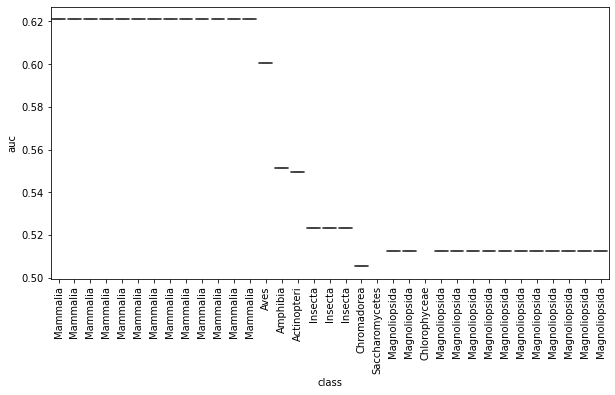

In [554]:
fig, axes = plt.subplots(figsize=(10,5))
chart = sns.boxplot(data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['yeast'])].groupby(['class'])['auc', 'auc_h', 'auc_diff'].mean().reset_index(), x='class', y='auc', order = mya.sort_values(by=['mya'])['class'].to_list(), ax=axes)

chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

<ipython-input-552-027abae38170>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  chart = sns.boxplot(data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['yeast'])].groupby(['class'])['auc', 'auc_h', 'auc_diff'].mean().reset_index(), x='class', y='auc', order = mya.sort_values(by=['mya'])['class'].to_list(), ax=axes)


[Text(0, 0, 'Mammalia'),
 Text(1, 0, 'Mammalia'),
 Text(2, 0, 'Mammalia'),
 Text(3, 0, 'Mammalia'),
 Text(4, 0, 'Mammalia'),
 Text(5, 0, 'Mammalia'),
 Text(6, 0, 'Mammalia'),
 Text(7, 0, 'Mammalia'),
 Text(8, 0, 'Mammalia'),
 Text(9, 0, 'Mammalia'),
 Text(10, 0, 'Mammalia'),
 Text(11, 0, 'Mammalia'),
 Text(12, 0, 'Mammalia'),
 Text(13, 0, 'Aves'),
 Text(14, 0, 'Amphibia'),
 Text(15, 0, 'Actinopteri'),
 Text(16, 0, 'Insecta'),
 Text(17, 0, 'Insecta'),
 Text(18, 0, 'Insecta'),
 Text(19, 0, 'Chromadorea'),
 Text(20, 0, 'Saccharomycetes'),
 Text(21, 0, 'Magnoliopsida'),
 Text(22, 0, 'Magnoliopsida'),
 Text(23, 0, 'Chlorophyceae'),
 Text(24, 0, 'Magnoliopsida'),
 Text(25, 0, 'Magnoliopsida'),
 Text(26, 0, 'Magnoliopsida'),
 Text(27, 0, 'Magnoliopsida'),
 Text(28, 0, 'Magnoliopsida'),
 Text(29, 0, 'Magnoliopsida'),
 Text(30, 0, 'Magnoliopsida'),
 Text(31, 0, 'Magnoliopsida'),
 Text(32, 0, 'Magnoliopsida'),
 Text(33, 0, 'Magnoliopsida'),
 Text(34, 0, 'Magnoliopsida')]

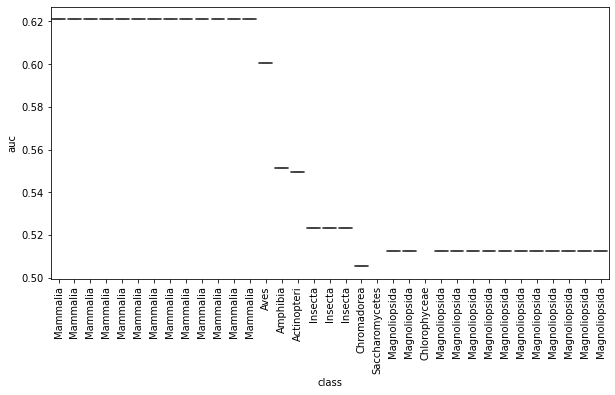

In [552]:
fig, axes = plt.subplots(figsize=(10,5))
chart = sns.boxplot(data=df_agg_ck_4[~df_agg_ck_4['species'].isin(['yeast'])].groupby(['class'])['auc', 'auc_h', 'auc_diff'].mean().reset_index(), x='class', y='auc', order = mya.sort_values(by=['mya'])['class'].to_list(), ax=axes)

chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [537]:
df_agg_ck_4[df_agg_ck_4['class'] != 'Magnoliopsida']['saved_name']

['bee',
 'boar',
 'bombyx',
 'chicken',
 'chimp',
 'cow',
 'crabm',
 'dog',
 'goat',
 'horse',
 'mosquito',
 'mouse',
 'rabbit',
 'rat',
 'rhesusm',
 'roundworm',
 'sheep',
 'wfrog',
 'yeast',
 'zebrafish']